In [499]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sis

## **SEÑALES ELECTROMIOGRÁFICAS**
### Las señales electromiográficas (EMG) son señales eléctricas que se generan en los procesos de activación muscular, generando potenciales eléctricos en los procesos de contracción y relajación muscular. Para captar estos impulsos, se utilizan electrodos de inserción, los cuales llegan hasta el tejido muscular que se desea evaluar, aunque también pueden ser electrodos superficiales. 
### La importancia del análisis de estas señales radica en la información que aporta acerca de patologías, biomecánica y deporte. En el caso de la medicina, la función muscular aporta información de diagnóstico de trastornos musculares, atrofia y enfermedades asociadas al sistema nervioso o a la interacción entre músculo y tejido neuronal. 
### Así mismo, permite analizar la fatiga muscular de actividades rutinarias y específicas, con el fin de determinar condiciones ergonómicas para dicha actividad, función muscular y eficiencia en los movimientos. También desde el aspecto biomecánico, es fundamental para el análisis y modelado de prótesis activas, de forma que se pueda emular con mayor exactitud el funcionamiento muscular de la parte remplazada. 
### Las características de la señal pueden variar dependiendo del movimiento ejecutado, de la condición muscular del paciente y de las fuentes de error, como la ubicación y adherencia de los electrodos (mejoran con la fijación de un gel conductor para el caso de electrodos superficiales), impedancia de la piel, y campos electromagnéticos externos, como celulares y demás aparatos electrónicos [1].

## **OPERADOR DE ENERGÍA DE TEAGER KAISER (TKEO)**
### Para el análisis de las señales electromiográficas, es importante conocer como es el proceso de captación de las señales, las cuales deben ser amplificadas, filtradas y convertidas a digital, de tal manera que se puedan analizar en ordenadores. Dentro del proceso de filtrado, una operación importante que se puede utilizar es el Operador de Energía de Teager – Kaiser (TKEO), el cual permite reducir la relación señal/ruido de una señal electromiográfica, disminuyendo la detección errónea de inicio, es decir, captando la energía propia del movimiento muscular o de potenciales de acción muscular individuales. 
### El TKEO toma la señal y la rectifica (convierte todos los valores a positivo) y se eleva al cuadrado para remarcar picos y cambios en la amplitud, posteriormente se calcula la primera derivada de la señal, de forma que los cambios rápidos de amplitud propios de una frecuencia específica (asociados al movimiento muscular) son enfatizados y promediados para suavizar la señal, haciendo que esta sea menos ruidosa. En conclusión, el TKEO mide los cambios instantáneos de energía de la señal [2].

## **REFERENCIAS**
### [1]L. Gila, A. Malanda, I. R. Carreño, J. R. Falces, and J. Navallas, “Métodos de procesamiento y análisis de señales electromiográficas Electromyographic signal processing and analysis methods,” 2009.  
### [2]S. Solnik, P. Rider, K. Steinweg, P. Devita, and T. Hortobágyi, “Teager-Kaiser energy operator signal conditioning improves EMG onset detection”, doi: 10.1007/s00421-010-1521-8.

## 1. Crear una función que reciba la señal de EMG y permita aplicar el operador Teager-Kaiser Energy Operator (TKEO).
### Para este propósito aplicaremos el factor TKEO con una señal de prueba, Paciente "01", Primera serie. Además de esto se irán definiendo funciones conforme se vayan necesitando, ya sea para cargar los datos del paciente, o para transformar sus datos en un Dataframe.

In [500]:
ruta='.\\EMG_data_for_gestures-master'
def carpetas_pacientes(ruta):    
    lista_pacientes=os.listdir(ruta)
    rutas=[]
    for i in range(len(lista_pacientes)):
        if lista_pacientes[i].endswith('.txt'):
            del lista_pacientes[i]
    for i in range(len(lista_pacientes)):
        ruta_r=ruta+'\\'+lista_pacientes[i]+'\\'
        rutas.append(ruta_r)
    return rutas
def series_pacientes(carpetas):
    rutas=[]
    for i in range(len(carpetas)):
        datos=os.listdir(carpetas[i])    
        ser1=carpetas[i]+datos[0]
        ser2=carpetas[i]+datos[1]
        rutas.append([ser1,ser2])
    return rutas
carpetas=carpetas_pacientes(ruta)
series=series_pacientes(carpetas)

In [501]:
prueba=carpetas[0] #Prueba al cargar al paciente 1
def txt2df(ruta):
    r_series=os.listdir(ruta)
    df1=pd.read_csv(ruta+r_series[0],sep='\t',low_memory=False)
    df1=df1.drop('class',axis=1)
    df2=pd.read_csv(ruta+r_series[1],sep='\t',low_memory=False)
    df2=df2.drop('class',axis=1)
    return df1,df2


In [502]:
def imprimir_paciente(ser1,ser2):
    print('Serie 1')
    display(ser1)
    print('Serie 2')
    display(ser2)

### Ahora procedemos a definir la función TKEO para recibir los datos del paciente.

In [503]:
def TKEO(senal):
    senal_tkeo=np.zeros_like(senal)
    for i in range(1, len(senal) - 1):
        senal_tkeo[i]=senal[i]**2 - (senal[i-1] * senal[i+1])
    senal_tkeo[0]=senal_tkeo[1]
    senal_tkeo[-1]=senal_tkeo[-2]
    return senal_tkeo

### Una vez definidad la función, vamos a aplicar la prueba cargando los datos del primer canal y haremos una comparación en el tiempo.

C:\Users\Juan Camilo\AppData\Local\Temp\ipykernel_5676\3148811481.py:5: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 63196.
  sig1=sis.shapiro(ch1)[1]
C:\Users\Juan Camilo\AppData\Local\Temp\ipykernel_5676\3148811481.py:6: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 63196.
  sig2=sis.shapiro(tk_ch1)[1]


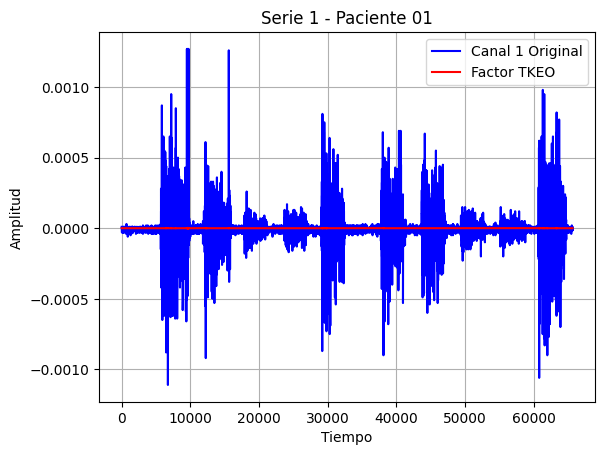

Significancia prueba Shapiro Canal 1: 2.3460594447569095e-127
Significancia prueba Shapiro Canal 1 (TKEO): 4.0960626331944723e-168
Significancia prueba Levene: 0.0
Significancia prueba Mann-Whitney : 0.0


In [504]:
a,b=txt2df(prueba)
t=list(a['time'])
ch1=list(a['channel1'])
tk_ch1=TKEO(ch1)
sig1=sis.shapiro(ch1)[1]
sig2=sis.shapiro(tk_ch1)[1]
levene=sis.levene(ch1,tk_ch1)[1]
mw=sis.mannwhitneyu(ch1,tk_ch1)[1]
plt.plot(t,ch1,'b',label='Canal 1 Original')
plt.plot(t,tk_ch1,'r',label='Factor TKEO')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Serie 1 - Paciente 01')
plt.grid(True)
plt.show()
print('Significancia prueba Shapiro Canal 1: {}'.format(sig1))
print('Significancia prueba Shapiro Canal 1 (TKEO): {}'.format(sig2))
print('Significancia prueba Levene: {}'.format(levene))
print('Significancia prueba Mann-Whitney : {}'.format(mw))

### **SAPHIRO:**
### - Hipótesis nula: los datos distribuyen normalmente.
### - Hipótesis alternativa: los datos no distribuyen normalmente.

### **LEVENE:**
### - Hipótesis nula: homocedastisidad.
### - Hipótesis alternativa: hetetocedastisidad.

### **U de MANN WHITNEY:**
### - Hipótesis nula: no hay diferencias significativas en el valor de la mediana.
### - Hipótesis alternativa: hay diferencia significativa en el valor de las medianas.

### Dados los resultados, en las tres pruebas se rechaza las hipótesis nulas, teniendo que los datos no distribuyen normalmente, no hay igualdad entre las varianzas, y tampoco entre las medianas de los datos.

## 2. Crear una función que reciba una señal EMG de múltiples canales y calcule el operador TKEO para cada canal.

In [505]:
def TKEO_multiple(dataframe):
    tkeo_data={}
    df=dataframe.drop('time',axis=1)
    canales=df.columns
    for i in range(len(canales)):
        ch=list(df['channel{}'.format(i+1)])
        tk=TKEO(ch)
        tkeo_data['channel{}'.format(i+1)]=tk
    return pd.DataFrame(tkeo_data)

### Una vez creada la función, la llamaremos usando la misma señal de prueba del numeral anterior, paciente '01'. Esta vez si cargaremos ambas series de dicho paciente para comparar.

In [506]:
print('TKEO Serie 1')
punto_2_s1=TKEO_multiple(a)
display(punto_2_s1)
print('TKEO Serie 2')
punto_2_s2=TKEO_multiple(b)
display(punto_2_s2)


TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,2.000000e-10,6.000000e-10,3.000000e-10,9.000000e-10,0.000000e+00,-1.000000e-10,0.000000e+00,2.000000e-10
1,2.000000e-10,6.000000e-10,3.000000e-10,9.000000e-10,0.000000e+00,-1.000000e-10,0.000000e+00,2.000000e-10
2,2.000000e-10,3.000000e-10,6.000000e-10,0.000000e+00,1.000000e-10,2.000000e-10,1.000000e-10,2.000000e-10
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
63191,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
63192,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
63193,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
63194,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,-2.000000e-10,-4.000000e-10,-1.200000e-09,-4.000000e-10,-2.000000e-10,1.000000e-10,3.000000e-10,9.000000e-10
3,6.000000e-10,2.100000e-09,6.400000e-09,1.800000e-09,8.000000e-10,0.000000e+00,4.000000e-10,-6.000000e-10
4,0.000000e+00,-4.000000e-10,0.000000e+00,5.000000e-10,-2.000000e-10,0.000000e+00,0.000000e+00,4.000000e-10
...,...,...,...,...,...,...,...,...
57969,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
57970,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
57971,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
57972,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


## 3. Crear una función que reciba una señal EMG de múltiples canales que extraiga las siguientes características para cada canal: [RMS, Varianza, Mean Absolute Value, Mean Absolute Value Slope, Slope Sign Changes, Wave form length, Zero Crossing].


In [507]:
def creacion_variables_t(ser):
    t=ser['time']
    c1=ser['channel1']
    c2=ser['channel2']
    c3=ser['channel3']
    c4=ser['channel4']
    c5=ser['channel5']
    c6=ser['channel6']
    c7=ser['channel7']
    c8=ser['channel8']
    return np.array([t,c1,c2,c3,c4,c5,c6,c7,c8])

In [508]:
def creacion_variables(ser):
    c1=ser['channel1']
    c2=ser['channel2']
    c3=ser['channel3']
    c4=ser['channel4']
    c5=ser['channel5']
    c6=ser['channel6']
    c7=ser['channel7']
    c8=ser['channel8']
    return np.array([c1,c2,c3,c4,c5,c6,c7,c8])

In [509]:
def analisis_serie(serie):
    resultados=[]
    for i in range(len(serie)):
        rms=np.sqrt(np.mean(serie[i]**2))
        varianza=np.var(serie[i])
        mean_abs_value=np.mean(np.abs(serie[i]))
        mean_abs_slope=np.mean(np.diff(np.abs(serie[i])))
        slope_sign_changes=np.sum(np.diff(np.sign(np.diff(serie[i]))) != 0)
        wave_length=np.sum(np.abs(np.diff(serie[i])))
        zero_crossings=np.sum(np.abs(np.diff(np.sign(serie[i]))) > 0)
        canal_resultados ={"Canal": i+1,
            "RMS": rms,
            "Varianza": varianza,
            "Valor Absoluto Medio": mean_abs_value,
            "Pendiente del Valor Absoluto Medio": mean_abs_slope,
            "Cambios de Signo de la Pendiente": slope_sign_changes,
            "Longitud de la Forma de Onda": wave_length,
            "Cruces por Cero": zero_crossings}        
        resultados.append(canal_resultados)    
    df_resultados=pd.DataFrame(resultados)
    return df_resultados

### Ahora llamamos la función usando la Serie 1 como ejemplo.

In [510]:
ser1=creacion_variables(a)
an_s1=analisis_serie(ser1)
display(an_s1)


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000144,2.075224e-08,0.000074,-1.286734e-24,9955,0.72746,3767
1,2,0.000134,1.782560e-08,0.000076,-1.582404e-10,10338,0.75085,3919
2,3,0.000124,1.541604e-08,0.000073,6.329615e-10,10462,0.74312,3990
3,4,0.000155,2.390305e-08,0.000082,-3.164807e-10,10261,0.80852,3895
4,5,0.000198,3.923162e-08,0.000107,4.747211e-10,9983,1.02317,3558
5,6,0.000161,2.567901e-08,0.000088,1.544081e-23,9773,0.82774,3483
6,7,0.000134,1.780039e-08,0.000070,1.582404e-10,9797,0.66229,3614
7,8,0.000142,2.022076e-08,0.000075,4.747211e-10,9850,0.70037,3601


### Para este numeral se definieron tres funciones, dos que permiten procesar los datos del Dataframe deseado (con o sin tiempo, dependiendo de la necesidad), y otra que permita hacer los cálculos pedidos.

## 4. Crear una rutina que aplique sobre todos los archivos de la base de datos las funciones descritas en 2 y 3.

In [511]:
ruta='.\\EMG_data_for_gestures-master'
carpetas=carpetas_pacientes(ruta)
series=series_pacientes(carpetas)
contador=1
for i in range(len(carpetas)):
    print ("Paciente {}\n".format(contador))
    s1,s2=txt2df(carpetas[i])
    print('TKEO Serie 1')
    tk_s1=TKEO_multiple(s1)
    tk1=pd.DataFrame(tk_s1)
    display(tk_s1)
    print('TKEO Serie 2')
    tk_s2=TKEO_multiple(s2)
    tk2=pd.DataFrame(tk_s2)
    display(tk_s2)
    ser1=creacion_variables(tk1)
    an_s1=analisis_serie(ser1)
    ser2=creacion_variables(tk2)
    an_s2=analisis_serie(ser2)
    print("Análisis TKEO Paciente {}".format(contador))
    print("Serie 1")
    display(an_s1)
    print("Serie 2")
    display(an_s2)
    contador+=1

Paciente 1

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,2.000000e-10,6.000000e-10,3.000000e-10,9.000000e-10,0.000000e+00,-1.000000e-10,0.000000e+00,2.000000e-10
1,2.000000e-10,6.000000e-10,3.000000e-10,9.000000e-10,0.000000e+00,-1.000000e-10,0.000000e+00,2.000000e-10
2,2.000000e-10,3.000000e-10,6.000000e-10,0.000000e+00,1.000000e-10,2.000000e-10,1.000000e-10,2.000000e-10
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
63191,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
63192,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
63193,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
63194,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,-2.000000e-10,-4.000000e-10,-1.200000e-09,-4.000000e-10,-2.000000e-10,1.000000e-10,3.000000e-10,9.000000e-10
3,6.000000e-10,2.100000e-09,6.400000e-09,1.800000e-09,8.000000e-10,0.000000e+00,4.000000e-10,-6.000000e-10
4,0.000000e+00,-4.000000e-10,0.000000e+00,5.000000e-10,-2.000000e-10,0.000000e+00,0.000000e+00,4.000000e-10
...,...,...,...,...,...,...,...,...
57969,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
57970,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
57971,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
57972,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Análisis TKEO Paciente 1
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,4.526063e-08,2.032273e-15,4.625889e-09,-3.164807e-15,14702,0.000435,10359
1,2,4.067880e-08,1.642103e-15,4.023581e-09,-9.494422e-15,15057,0.000372,10617
2,3,3.834531e-08,1.459576e-15,3.684762e-09,-4.747211e-15,15218,0.000333,10669
3,4,5.354677e-08,2.843707e-15,5.501842e-09,-1.424163e-14,15023,0.000503,10558
4,5,7.288115e-08,5.254594e-15,8.669803e-09,2.439034e-26,14825,0.000789,10491
5,6,4.963728e-08,2.440234e-15,5.620281e-09,-1.582404e-15,14495,0.000525,10329
6,7,4.194962e-08,1.748472e-15,3.906010e-09,-6.525034e-27,14504,0.000365,10255
7,8,4.385445e-08,1.909609e-15,4.285054e-09,-3.164807e-15,14624,0.000407,10350


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,3.250070e-08,1.048761e-15,3.122501e-09,-1.600109e-26,11626,0.000263,8214
1,2,3.225565e-08,1.032770e-15,3.190913e-09,8.355918e-28,11878,0.000267,8383
2,3,2.175101e-08,4.675374e-16,2.669947e-09,-3.252298e-27,11946,0.000221,8450
3,4,4.271918e-08,1.809454e-15,4.571344e-09,1.810657e-26,11943,0.000393,8433
4,5,6.527882e-08,4.225045e-15,6.986192e-09,-1.649959e-26,11838,0.000602,8425
5,6,2.772488e-08,7.605163e-16,3.311436e-09,-1.485606e-26,11653,0.000282,8319
6,7,1.968068e-08,3.839138e-16,2.121166e-09,-1.601625e-27,11600,0.000176,8226
7,8,2.907488e-08,8.387387e-16,2.953824e-09,3.772202e-26,11462,0.000244,8083


Paciente 2

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
72317,0.0,-9.000000e-10,6.000000e-10,0.0,-2.000000e-10,3.000000e-08,2.000000e-09,1.000000e-10
72318,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
72319,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
72320,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,-1.000000e-10,4.000000e-10,6.000000e-10,4.400000e-09,2.000000e-10,0.000000e+00,0.000000e+00,0.0
1,-1.000000e-10,4.000000e-10,6.000000e-10,4.400000e-09,2.000000e-10,0.000000e+00,0.000000e+00,0.0
2,2.000000e-10,1.200000e-09,-2.000000e-10,7.700000e-09,2.000000e-10,1.000000e-10,4.000000e-10,0.0
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...
64099,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
64100,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
64101,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
64102,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0


Análisis TKEO Paciente 2
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,8.338767e-08,6.919784e-15,6.503654e-09,2.987508e-26,16978,0.000650,11876
1,2,1.296842e-08,1.673744e-16,9.977794e-10,2.699280e-27,17291,0.000102,12094
2,3,2.138269e-08,4.516500e-16,2.681408e-09,1.447432e-26,17440,0.000280,12297
3,4,1.027671e-07,1.041612e-14,1.389814e-08,-6.588073e-26,17694,0.001468,12543
4,5,5.827117e-08,3.347838e-15,7.967902e-09,-1.610418e-26,17822,0.000845,12737
5,6,3.859108e-08,1.474945e-15,4.313172e-09,3.294037e-27,17602,0.000454,12565
6,7,4.159657e-08,1.713258e-15,4.822878e-09,8.292279e-28,17201,0.000508,12200
7,8,3.141598e-08,9.817713e-16,2.581133e-09,-8.528895e-27,16885,0.000276,11894


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,4.699264e-08,2.195387e-15,4.040512e-09,-1.559989e-15,14678,0.000377,10296
1,2,5.644176e-09,3.155993e-17,6.210860e-10,-6.239958e-15,15055,0.000058,10563
2,3,1.813120e-08,3.244225e-16,2.375977e-09,-9.359936e-15,15298,0.000224,10826
3,4,1.134005e-07,1.267520e-14,1.556031e-08,-6.863953e-14,15365,0.001408,10943
4,5,6.074602e-08,3.639625e-15,8.135974e-09,-3.119979e-15,15479,0.000741,11104
5,6,2.780831e-08,7.649384e-16,3.333054e-09,-5.269642e-27,15216,0.000315,10821
6,7,3.667223e-08,1.333218e-15,3.949832e-09,1.176032e-26,14831,0.000375,10454
7,8,2.369781e-08,5.580917e-16,2.145440e-09,1.176516e-26,14904,0.000208,10527


Paciente 3

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,2.400000e-09,8.100000e-09,-4.000000e-10,0.0,1.200000e-09,3.000000e-10,-1.000000e-10
1,0.0,2.400000e-09,8.100000e-09,-4.000000e-10,0.0,1.200000e-09,3.000000e-10,-1.000000e-10
2,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
3,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
4,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
56563,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
56564,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
56565,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
56566,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,8.000000e-10,2.000000e-10,1.000000e-10,6.000000e-10,1.000000e-10,0.000000e+00,8.000000e-10,2.000000e-10
4,4.000000e-10,1.000000e-10,-2.000000e-10,-3.000000e-10,-2.000000e-10,0.000000e+00,6.000000e-10,0.000000e+00
...,...,...,...,...,...,...,...,...
49212,0.000000e+00,1.000000e-09,8.640000e-08,2.340000e-08,9.000000e-10,1.000000e-10,0.000000e+00,0.000000e+00
49213,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
49214,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
49215,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Análisis TKEO Paciente 3
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,8.671056e-08,7.409609e-15,1.195980e-08,-3.348947e-26,13514,0.000975,9521
1,2,1.203834e-07,1.427617e-14,1.677889e-08,-4.242756e-14,13805,0.001321,9754
2,3,3.868036e-08,1.449473e-15,7.664052e-09,-1.431930e-13,13931,0.000608,9921
3,4,6.318404e-08,3.940683e-15,8.152196e-09,-7.071261e-15,13747,0.000663,9671
4,5,1.085657e-07,1.160264e-14,1.550696e-08,-4.651584e-26,13764,0.001233,9723
5,6,9.250836e-08,8.394878e-15,1.451891e-08,-2.121378e-14,13629,0.001133,9704
6,7,6.320644e-08,3.950508e-15,7.774505e-09,-5.303445e-15,13540,0.000641,9598
7,8,5.727149e-08,3.238782e-15,7.384804e-09,-1.767815e-15,13516,0.000590,9547


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,8.437197e-08,6.996882e-15,1.268044e-08,8.574797e-27,11330,0.000893,8012
1,2,1.246003e-07,1.529534e-14,1.731477e-08,1.740716e-25,11441,0.001189,8128
2,3,3.243268e-08,1.019163e-15,6.417000e-09,-1.038682e-26,11602,0.000448,8274
3,4,6.756093e-08,4.494934e-15,9.600866e-09,-2.501954e-26,11531,0.000679,8173
4,5,1.220573e-07,1.458635e-14,2.029977e-08,-8.198317e-26,11504,0.001417,8191
5,6,1.140409e-07,1.272828e-14,1.903520e-08,-2.639983e-26,11555,0.001291,8263
6,7,6.491441e-08,4.159110e-15,8.638763e-09,-8.029615e-27,11397,0.000605,8155
7,8,4.865382e-08,2.330991e-15,7.005870e-09,-1.882926e-26,11425,0.000486,8119


Paciente 4

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
59102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
55086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Análisis TKEO Paciente 4
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,7.161642e-08,5.062142e-15,9.476690e-09,9.790284e-27,13676,0.000817,9706
1,2,2.198186e-08,4.781671e-16,2.555269e-09,2.231307e-27,13775,0.000212,9740
2,3,2.532566e-08,6.316329e-16,3.545145e-09,6.283695e-27,13891,0.000304,9825
3,4,6.307974e-08,3.918368e-15,9.035942e-09,-2.275915e-26,13859,0.000773,9848
4,5,9.158858e-08,8.213721e-15,1.525948e-08,-3.941567e-26,13992,0.001281,10000
5,6,2.510044e-08,6.197396e-16,3.696596e-09,-2.102904e-26,13793,0.000315,9786
6,7,1.941869e-08,3.726591e-16,2.432844e-09,-4.117115e-27,13573,0.000208,9547
7,8,3.108379e-08,9.560571e-16,3.683410e-09,-1.939164e-27,13614,0.000315,9607


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,7.947201e-08,6.204854e-15,1.204321e-08,-1.047395e-26,13009,0.000975,9230
1,2,2.112559e-08,4.392335e-16,2.967116e-09,1.035759e-26,13110,0.000234,9225
2,3,3.961195e-08,1.542817e-15,5.836029e-09,-2.439950e-29,13278,0.000471,9433
3,4,7.708823e-08,5.832434e-15,1.216562e-08,-6.442219e-26,13127,0.000978,9317
4,5,9.898520e-08,9.602665e-15,1.637124e-08,-5.540845e-26,13201,0.001295,9438
5,6,4.263259e-08,1.786512e-15,6.430958e-09,-6.650741e-27,13145,0.000518,9348
6,7,3.967780e-08,1.561590e-15,4.128206e-09,-2.657763e-26,12871,0.000338,9087
7,8,3.057807e-08,9.237183e-16,3.823394e-09,-9.792646e-27,12943,0.000304,9170


Paciente 5

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,6.000000e-10,1.000000e-10,0.000000e+00,0.000000e+00,6.000000e-10,1.000000e-10,0.000000e+00
4,0.000000e+00,3.000000e-10,0.000000e+00,4.000000e-10,1.000000e-10,3.000000e-10,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
57113,6.000000e-10,0.000000e+00,2.400000e-09,1.800000e-09,4.000000e-10,-2.000000e-10,0.000000e+00,0.000000e+00
57114,-2.000000e-10,4.000000e-10,4.000000e-09,1.800000e-09,0.000000e+00,6.000000e-10,1.000000e-10,4.000000e-10
57115,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
57116,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
50125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Análisis TKEO Paciente 5
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,3.250382e-08,1.051428e-15,2.562844e-09,-2.548960e-26,12978,0.000220,9101
1,2,1.797622e-08,3.216472e-16,1.412408e-09,-2.108067e-27,13285,0.000118,9296
2,3,8.520730e-09,7.185047e-17,9.675689e-10,4.706720e-29,13282,0.000080,9267
3,4,3.297650e-08,1.076396e-15,3.771314e-09,-3.178212e-26,13400,0.000313,9444
4,5,6.812965e-08,4.591045e-15,8.186640e-09,-5.352264e-26,13331,0.000669,9464
5,6,5.121361e-08,2.595570e-15,6.041862e-09,-4.021982e-26,13263,0.000498,9400
6,7,1.984053e-08,3.887035e-16,2.555921e-09,1.278961e-27,12934,0.000212,9175
7,8,2.786486e-08,7.700338e-16,2.955534e-09,-2.805929e-29,12833,0.000255,9072


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,2.116333e-08,4.460344e-16,1.576340e-09,-2.617477e-27,11514,0.000116,8087
1,2,1.720824e-08,2.953563e-16,9.762537e-10,8.509380e-27,11700,0.000067,8172
2,3,7.220676e-09,5.133813e-17,1.016619e-09,2.419465e-27,11874,0.000075,8340
3,4,3.692933e-08,1.349274e-15,4.359423e-09,2.817553e-27,11898,0.000316,8399
4,5,7.506477e-08,5.562698e-15,9.861033e-09,7.517977e-26,11906,0.000734,8484
5,6,6.570776e-08,4.266262e-15,8.125522e-09,1.646185e-26,11631,0.000574,8294
6,7,2.589149e-08,6.637607e-16,2.925035e-09,2.454530e-28,11540,0.000214,8205
7,8,3.371600e-08,1.128351e-15,3.238097e-09,-8.379434e-27,11510,0.000237,8115


Paciente 6

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
51073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
48536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Análisis TKEO Paciente 6
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,5.634136e-08,3.152330e-15,5.333511e-09,-2.108155e-26,11628,0.000389,8276
1,2,1.240660e-08,1.519265e-16,1.641691e-09,5.538614e-27,11832,0.000124,8437
2,3,2.720078e-08,7.311524e-16,3.442508e-09,-6.275476e-27,11758,0.000258,8398
3,4,6.680127e-08,4.417644e-15,7.730048e-09,2.112406e-26,11684,0.000571,8308
4,5,4.673801e-08,2.157041e-15,6.179486e-09,-5.020786e-26,11826,0.000465,8493
5,6,2.284400e-08,5.121262e-16,3.642703e-09,1.182725e-26,11739,0.000272,8441
6,7,1.464394e-08,2.115259e-16,2.031530e-09,-6.602408e-27,11706,0.000154,8357
7,8,3.503465e-08,1.215585e-15,3.984582e-09,-9.313009e-27,11667,0.000295,8336


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,5.564699e-08,3.068827e-15,5.913024e-09,-7.897538e-27,11572,0.000403,8226
1,2,1.087044e-08,1.164190e-16,1.474691e-09,-5.992117e-27,11597,0.000103,8185
2,3,2.834579e-08,7.956118e-16,3.183834e-09,-2.466716e-27,11716,0.000226,8285
3,4,8.956492e-08,7.948038e-15,9.855802e-09,5.375545e-26,11726,0.000695,8316
4,5,6.141672e-08,3.729899e-15,7.605764e-09,-1.352433e-26,11776,0.000535,8425
5,6,2.473842e-08,6.020167e-16,3.628916e-09,9.356693e-27,11709,0.000261,8353
6,7,1.698759e-08,2.848306e-16,2.233003e-09,1.495154e-26,11526,0.000161,8135
7,8,3.574400e-08,1.263500e-15,4.269879e-09,4.303972e-27,11428,0.000294,8097


Paciente 7

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,2.400000e-09,2.500000e-09,-5.000000e-10,3.500000e-09,9.610000e-08,9.000000e-10,0.000000e+00,2.000000e-10
1,2.400000e-09,2.500000e-09,-5.000000e-10,3.500000e-09,9.610000e-08,9.000000e-10,0.000000e+00,2.000000e-10
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,1.800000e-09,2.500000e-09,-1.000000e-10,6.300000e-09,-6.200000e-09,-3.000000e-10,0.000000e+00,-1.000000e-10
4,1.800000e-09,0.000000e+00,2.000000e-10,1.800000e-09,6.600000e-09,4.000000e-10,4.000000e-10,2.000000e-10
...,...,...,...,...,...,...,...,...
68692,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
68693,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
68694,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
68695,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
63938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Análisis TKEO Paciente 7
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,2.918326e-08,8.408871e-16,3.715127e-09,-3.493653e-14,16267,0.000374,11563
1,2,3.922110e-09,1.521492e-17,4.706523e-10,-3.639222e-14,16044,0.000047,11298
2,3,1.829850e-08,3.317362e-16,2.024681e-09,-7.278444e-15,16363,0.000203,11548
3,4,8.726664e-08,7.502816e-15,1.225804e-08,-5.094911e-14,16772,0.001223,12023
4,5,9.582914e-08,8.998135e-15,1.589593e-08,-1.398917e-12,16909,0.001593,12203
5,6,1.507669e-08,2.250128e-16,1.759706e-09,-1.310120e-14,16192,0.000179,11378
6,7,2.154452e-08,4.608428e-16,2.082039e-09,-1.331302e-27,15734,0.000214,11131
7,8,8.426783e-08,7.038854e-15,9.052672e-09,-2.911378e-15,15965,0.000869,11270


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,3.635931e-08,1.302673e-15,5.055173e-09,3.271459e-26,15251,0.000477,10821
1,2,4.852999e-09,2.318550e-17,6.956852e-10,4.217273e-27,14990,0.000065,10568
2,3,2.506153e-08,6.212504e-16,2.961320e-09,-1.045263e-26,15160,0.000275,10750
3,4,9.956336e-08,9.751734e-15,1.467981e-08,-1.821448e-26,15525,0.001362,11112
4,5,1.182148e-07,1.368357e-14,1.972074e-08,-1.645513e-26,15623,0.001792,11269
5,6,1.928308e-08,3.672585e-16,2.468572e-09,1.099596e-26,14975,0.000230,10630
6,7,3.801696e-08,1.434093e-15,3.818352e-09,2.444337e-26,14671,0.000361,10373
7,8,1.066322e-07,1.124562e-14,1.283931e-08,4.360382e-26,14815,0.001191,10450


Paciente 8

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
60275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,1.000000e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e-10,1.000000e-10,1.000000e-10
4,1.000000e-10,4.000000e-10,-3.000000e-10,1.000000e-10,0.000000e+00,-4.000000e-10,-2.000000e-10,-2.000000e-10
...,...,...,...,...,...,...,...,...
57663,0.000000e+00,-1.000000e-10,1.500000e-09,1.600000e-09,2.000000e-10,0.000000e+00,0.000000e+00,3.000000e-10
57664,0.000000e+00,5.000000e-10,-6.000000e-10,-1.120000e-08,-4.000000e-10,3.000000e-10,0.000000e+00,-1.000000e-10
57665,1.000000e-10,2.000000e-09,1.000000e-09,8.960000e-08,8.000000e-10,-2.000000e-10,0.000000e+00,2.000000e-10
57666,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Análisis TKEO Paciente 8
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,6.978882e-08,4.810292e-15,8.968638e-09,-5.049892e-27,14211,0.000798,10085
1,2,3.365415e-08,1.118491e-15,4.319361e-09,-1.084766e-26,14423,0.000381,10167
2,3,9.942847e-08,9.749846e-15,1.331626e-08,-5.620235e-26,14584,0.001156,10334
3,4,1.484302e-07,2.157565e-14,2.451938e-08,-7.080827e-26,14716,0.002115,10473
4,5,1.470666e-07,2.111375e-14,2.624890e-08,-2.678639e-26,14664,0.002267,10461
5,6,1.133105e-07,1.257403e-14,1.870060e-08,-2.524946e-26,14352,0.001617,10219
6,7,1.057185e-07,1.101567e-14,1.430582e-08,3.029935e-26,14289,0.001229,10173
7,8,8.301175e-08,6.780661e-15,1.216848e-08,2.612770e-26,14163,0.001069,10066


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,7.406406e-08,5.419471e-15,9.240442e-09,-4.067177e-26,13466,0.000768,9486
1,2,2.573103e-08,6.536231e-16,3.336799e-09,4.055791e-27,13627,0.000280,9620
2,3,8.259042e-08,6.726399e-15,1.123457e-08,-3.345400e-26,13900,0.000921,9835
3,4,1.463058e-07,2.097208e-14,2.423687e-08,-2.886031e-26,13932,0.002001,9883
4,5,1.644904e-07,2.634184e-14,3.115493e-08,-1.167501e-25,13887,0.002583,9918
5,6,1.163541e-07,1.327663e-14,1.885149e-08,6.006588e-29,13640,0.001579,9788
6,7,1.134096e-07,1.270546e-14,1.480082e-08,3.454774e-26,13424,0.001236,9510
7,8,8.021928e-08,6.353210e-15,1.050592e-08,3.238178e-26,13384,0.000892,9486


Paciente 9

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.0,0.000000e+00,-6.000000e-10,0.0,2.000000e-10,0.000000e+00,1.000000e-10,2.000000e-10
3,0.0,9.000000e-10,1.500000e-09,0.0,2.000000e-10,1.600000e-09,0.000000e+00,-1.000000e-10
4,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
62765,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
62766,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
62767,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
62768,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
64872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Análisis TKEO Paciente 9
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,2.792412e-08,7.724432e-16,3.085143e-09,3.316781e-27,14196,0.000280,9982
1,2,2.275998e-08,5.150739e-16,1.947077e-09,9.142356e-27,14767,0.000177,10392
2,3,6.132711e-09,3.714464e-17,7.741676e-10,8.598757e-28,14586,0.000071,10239
3,4,3.849364e-08,1.471451e-15,3.723103e-09,8.821138e-28,14665,0.000341,10354
4,5,7.247076e-08,5.204084e-15,7.991498e-09,1.330419e-26,14708,0.000717,10427
5,6,5.884464e-08,3.427019e-15,6.976282e-09,-3.767721e-26,14677,0.000643,10412
6,7,2.529542e-08,6.348471e-16,2.565538e-09,8.074101e-27,14255,0.000241,10063
7,8,5.554652e-08,3.059715e-15,5.923664e-09,-1.261398e-26,14311,0.000549,10132


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,3.832954e-08,1.455074e-15,4.279281e-09,1.660073e-26,14043,0.000409,9964
1,2,2.665235e-08,7.062285e-16,2.281601e-09,-3.060043e-27,14745,0.000213,10484
2,3,4.122675e-09,1.666411e-17,6.652280e-10,-2.346033e-27,14506,0.000062,10216
3,4,3.283043e-08,1.068319e-15,3.580346e-09,-2.856040e-27,14617,0.000341,10321
4,5,7.606317e-08,5.731099e-15,8.533653e-09,-2.815877e-26,14429,0.000780,10269
5,6,4.847683e-08,2.329491e-15,5.300139e-09,1.362994e-26,14410,0.000504,10174
6,7,1.753573e-08,3.041640e-16,2.120257e-09,6.275479e-27,14070,0.000201,9984
7,8,6.421088e-08,4.087813e-15,6.823027e-09,-4.971135e-26,14179,0.000642,9999


Paciente 10

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
61636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
4,2.000000e-10,1.500000e-09,1.200000e-09,-3.000000e-10,3.000000e-10,4.000000e-10,1.000000e-10,0.0
...,...,...,...,...,...,...,...,...
61443,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
61444,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
61445,0.000000e+00,-1.000000e-10,0.000000e+00,-2.000000e-10,0.000000e+00,-1.000000e-10,0.000000e+00,0.0
61446,0.000000e+00,2.000000e-10,2.500000e-09,6.000000e-10,4.000000e-10,2.000000e-10,0.000000e+00,0.0


Análisis TKEO Paciente 10
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,3.020299e-08,9.037555e-16,3.388525e-09,-8.799865e-27,14708,0.000306,10404
1,2,6.316697e-09,3.933052e-17,8.654581e-10,-1.521441e-27,14785,0.000077,10376
2,3,2.005656e-08,3.986123e-16,2.178402e-09,-8.709283e-27,14865,0.000194,10469
3,4,9.472311e-08,8.834765e-15,1.345445e-08,-1.186791e-26,15276,0.001205,10881
4,5,1.250920e-07,1.541453e-14,1.780044e-08,-5.455044e-27,15210,0.001554,10946
5,6,9.253912e-08,8.407572e-15,1.423066e-08,-1.528821e-26,14886,0.001234,10597
6,7,7.784110e-08,6.011455e-15,7.927884e-09,1.463653e-26,14480,0.000718,10293
7,8,3.715995e-08,1.370731e-15,3.645870e-09,-4.118961e-27,14530,0.000325,10297


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,2.323822e-08,5.358975e-16,2.320085e-09,4.272405e-27,14438,0.000204,10095
1,2,5.408435e-09,2.885468e-17,7.196215e-10,3.254838e-15,14624,0.000064,10166
2,3,1.489218e-08,2.194105e-16,1.737495e-09,4.068547e-14,14808,0.000151,10355
3,4,7.881425e-08,6.123615e-15,1.073902e-08,9.764513e-15,15137,0.000948,10784
4,5,1.072427e-07,1.135953e-14,1.406956e-08,6.509675e-15,15033,0.001255,10721
5,6,7.476269e-08,5.517357e-15,9.792771e-09,3.254838e-15,14559,0.000866,10326
6,7,7.975130e-08,6.318849e-15,7.527659e-09,5.981198e-27,14169,0.000665,10019
7,8,3.549466e-08,1.251956e-15,3.311179e-09,-7.919682e-27,14241,0.000304,10079


Paciente 11

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
74676,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
74677,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
74678,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
74679,0.0,0.0,4.200000e-09,5.460000e-08,1.200000e-09,6.000000e-10,9.000000e-10,2.000000e-10


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,8.000000e-10,4.000000e-10,7.200000e-09,7.600000e-09,-3.000000e-10,-2.000000e-10,-2.000000e-10
1,0.000000e+00,8.000000e-10,4.000000e-10,7.200000e-09,7.600000e-09,-3.000000e-10,-2.000000e-10,-2.000000e-10
2,2.000000e-10,8.000000e-10,3.000000e-10,3.600000e-09,8.500000e-09,2.000000e-10,1.000000e-10,4.000000e-10
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
72640,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
72641,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
72642,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
72643,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Análisis TKEO Paciente 11
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,7.294756e-08,5.267414e-15,8.458465e-09,-2.734885e-26,16918,0.000918,11943
1,2,8.208026e-08,6.678550e-15,8.851162e-09,-8.593851e-27,17507,0.000927,12373
2,3,2.816638e-08,7.866773e-16,2.949367e-09,5.623996e-14,17622,0.000315,12302
3,4,1.089064e-07,1.170329e-14,1.434368e-08,7.311194e-13,17938,0.001516,12744
4,5,1.403027e-07,1.918148e-14,2.588681e-08,1.606856e-14,18250,0.002768,13072
5,6,1.212310e-07,1.444317e-14,1.843311e-08,8.034280e-15,17690,0.001943,12544
6,7,6.075640e-08,3.662900e-15,6.049258e-09,1.205142e-14,17021,0.000646,11992
7,8,1.027878e-07,1.044873e-14,1.253740e-08,2.678093e-15,16900,0.001352,11967


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,9.381874e-08,8.700476e-15,1.153314e-08,-1.737906e-26,16674,0.001203,11782
1,2,8.740378e-08,7.576125e-15,9.158461e-09,-1.101261e-14,17113,0.000953,12051
2,3,1.813059e-08,3.253284e-16,2.149713e-09,-5.506305e-15,17330,0.000234,12159
3,4,9.491664e-08,8.895922e-15,1.224218e-08,-9.911348e-14,17699,0.001281,12472
4,5,1.635329e-07,2.602736e-14,3.074701e-08,-1.046198e-13,17752,0.003199,12685
5,6,1.377448e-07,1.864566e-14,2.104591e-08,-4.129729e-15,17182,0.002183,12197
6,7,6.465145e-08,4.142698e-15,7.009679e-09,-2.753152e-15,16790,0.000734,11838
7,8,1.113794e-07,1.225813e-14,1.388695e-08,-2.753152e-15,16526,0.001439,11671


Paciente 12

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
65915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,9.000000e-10,1.500000e-08,5.600000e-08,-1.000000e-10,1.600000e-09,1.000000e-10,0.0
1,0.0,9.000000e-10,1.500000e-08,5.600000e-08,-1.000000e-10,1.600000e-09,1.000000e-10,0.0
2,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
3,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
4,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...
62626,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
62627,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
62628,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
62629,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0


Análisis TKEO Paciente 12
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,1.675845e-08,2.773561e-16,2.120772e-09,1.109282e-26,15214,0.000210,10736
1,2,3.120761e-08,9.679211e-16,2.775963e-09,-1.448796e-26,15335,0.000267,10858
2,3,6.989265e-09,4.814041e-17,9.571875e-10,-3.162207e-27,15376,0.000092,10833
3,4,4.160245e-08,1.707821e-15,5.475091e-09,1.228179e-26,15487,0.000525,10967
4,5,8.193463e-08,6.627539e-15,1.059342e-08,-1.254844e-29,15700,0.001002,11166
5,6,6.300754e-08,3.919368e-15,8.250279e-09,-7.745525e-26,15634,0.000791,11135
6,7,1.912042e-08,3.603885e-16,2.597621e-09,-1.152417e-26,15423,0.000254,10911
7,8,2.421082e-08,5.803358e-16,2.773230e-09,-6.951836e-27,15180,0.000269,10719


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,1.434625e-08,2.036432e-16,1.722166e-09,-6.302415e-27,14637,0.000162,10371
1,2,9.861672e-09,9.627949e-17,1.139912e-09,-1.437011e-14,14728,0.000106,10437
2,3,1.416064e-08,1.976402e-16,1.962744e-09,-2.395018e-13,14825,0.000183,10504
3,4,6.846033e-08,4.609124e-15,1.024086e-08,-8.941402e-13,14969,0.000943,10657
4,5,1.235429e-07,1.500973e-14,1.866775e-08,-1.596679e-15,15086,0.001695,10774
5,6,8.576410e-08,7.239559e-15,1.242738e-08,-2.554686e-14,14794,0.001146,10539
6,7,2.257182e-08,5.018716e-16,3.181144e-09,-1.596679e-15,14727,0.000293,10522
7,8,2.201502e-08,4.793890e-16,2.638427e-09,-7.283066e-27,14586,0.000238,10307


Paciente 13

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,4.000000e-10,0.000000e+00,6.300000e-09,1.170000e-08,8.400000e-09,1.000000e-10,1.000000e-10,3.000000e-10
3,0.000000e+00,0.000000e+00,-1.400000e-09,5.200000e-09,1.120000e-08,0.000000e+00,0.000000e+00,-2.000000e-10
4,0.000000e+00,8.000000e-10,1.200000e-09,0.000000e+00,-4.800000e-09,0.000000e+00,0.000000e+00,4.000000e-10
...,...,...,...,...,...,...,...,...
75671,-3.000000e-10,-4.000000e-10,3.600000e-09,1.160000e-08,1.280000e-08,4.500000e-09,5.000000e-10,2.000000e-10
75672,2.000000e-10,4.000000e-10,0.000000e+00,2.240000e-08,5.040000e-08,-9.000000e-10,-1.000000e-10,2.000000e-10
75673,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75674,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,1.200000e-09,5.000000e-10,2.600000e-08,7.000000e-09,-2.000000e-10,2.000000e-10,-2.000000e-10
1,0.000000e+00,1.200000e-09,5.000000e-10,2.600000e-08,7.000000e-09,-2.000000e-10,2.000000e-10,-2.000000e-10
2,-1.000000e-10,9.000000e-10,1.200000e-09,1.400000e-08,1.210000e-08,7.000000e-10,-1.000000e-10,8.000000e-10
3,2.000000e-10,6.000000e-10,3.200000e-09,0.000000e+00,-8.000000e-10,-2.000000e-10,0.000000e+00,-2.000000e-10
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
77559,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
77560,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
77561,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
77562,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Análisis TKEO Paciente 13
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,4.158290e-08,1.708409e-15,5.265073e-09,-7.146627e-27,17941,0.000587,12685
1,2,1.274426e-08,1.609221e-16,1.390508e-09,6.858330e-27,18134,0.000154,12709
2,3,5.632275e-08,3.139976e-15,6.404140e-09,1.603533e-26,18519,0.000704,13067
3,4,1.080049e-07,1.142662e-14,1.752268e-08,5.475733e-26,18724,0.001907,13391
4,5,1.181270e-07,1.358829e-14,2.205171e-08,-3.694576e-27,18918,0.002401,13628
5,6,7.090825e-08,4.950767e-15,1.009880e-08,-2.359801e-26,18607,0.001091,13278
6,7,4.060160e-08,1.630883e-15,4.798593e-09,-3.030468e-26,18129,0.000518,12825
7,8,6.850736e-08,4.638903e-15,8.440989e-09,1.430692e-26,17859,0.000935,12669


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,3.813744e-08,1.437073e-15,4.736228e-09,1.353808e-26,18363,0.000533,12943
1,2,8.189462e-09,6.625392e-17,1.025407e-09,-1.547129e-14,18647,0.000114,13047
2,3,3.795831e-08,1.424081e-15,4.667163e-09,-6.446373e-15,18992,0.000523,13449
3,4,8.762622e-08,7.538134e-15,1.347539e-08,-3.352114e-13,19473,0.001485,13938
4,5,9.785701e-08,9.342925e-15,1.762938e-08,-9.024922e-14,19675,0.001973,14123
5,6,6.527841e-08,4.201773e-15,8.975932e-09,-2.578549e-15,18953,0.001008,13507
6,7,3.665018e-08,1.327544e-15,4.497576e-09,-2.578549e-15,18237,0.000495,12909
7,8,7.946419e-08,6.242183e-15,9.662262e-09,-2.578549e-15,18100,0.001060,12862


Paciente 14

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,3.000000e-10,-2.000000e-10,1.000000e-08,-6.000000e-10,0.000000e+00,1.000000e-10,3.000000e-10,6.000000e-10
1,3.000000e-10,-2.000000e-10,1.000000e-08,-6.000000e-10,0.000000e+00,1.000000e-10,3.000000e-10,6.000000e-10
2,-2.000000e-10,6.000000e-10,5.250000e-08,1.000000e-09,1.000000e-10,0.000000e+00,-2.000000e-10,3.000000e-10
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
52816,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
52817,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
52818,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
52819,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
48177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Análisis TKEO Paciente 14
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,5.072938e-08,2.564152e-15,3.339933e-09,-5.679667e-15,12695,0.000268,8920
1,2,4.367105e-08,1.904203e-15,1.858554e-09,-3.786445e-15,13105,0.000154,9209
2,3,4.209041e-08,1.766715e-15,2.416654e-09,-1.893222e-13,13472,0.000197,9581
3,4,8.442484e-08,7.026455e-15,1.153210e-08,-1.135933e-14,13222,0.000890,9350
4,5,7.187427e-08,5.124115e-15,7.438969e-09,-5.005543e-26,13406,0.000602,9560
5,6,7.365391e-08,5.371342e-15,8.395297e-09,-1.893222e-15,13366,0.000672,9498
6,7,4.926446e-08,2.412721e-15,4.219956e-09,-5.679667e-15,12886,0.000336,9111
7,8,7.150604e-08,5.058482e-15,8.440743e-09,-1.135933e-14,12933,0.000665,9150


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,2.027706e-08,4.079799e-16,2.023278e-09,3.219036e-27,11356,0.000146,7977
1,2,1.623720e-08,2.625488e-16,1.246017e-09,4.187966e-27,11451,0.000091,8091
2,3,1.037662e-08,1.061602e-16,1.392916e-09,-9.807329e-28,11550,0.000099,8140
3,4,9.584573e-08,9.067652e-15,1.252856e-08,-3.921215e-26,11773,0.000886,8363
4,5,6.370374e-08,4.021344e-15,7.006760e-09,-1.065286e-26,11834,0.000468,8496
5,6,5.227706e-08,2.685954e-15,7.954172e-09,-5.493821e-28,11904,0.000568,8523
6,7,2.990140e-08,8.845891e-16,3.524598e-09,3.128259e-26,11626,0.000254,8253
7,8,6.425984e-08,4.074798e-15,8.486395e-09,-6.455240e-27,11397,0.000617,8070


Paciente 15

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,-1.000000e-10,4.000000e-10,7.000000e-10,2.800000e-09,2.800000e-09,7.000000e-10,1.200000e-09,4.000000e-10
1,-1.000000e-10,4.000000e-10,7.000000e-10,2.800000e-09,2.800000e-09,7.000000e-10,1.200000e-09,4.000000e-10
2,2.000000e-10,0.000000e+00,-3.000000e-10,-6.000000e-10,-3.000000e-10,1.000000e-09,-4.000000e-10,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
53548,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
53549,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
53550,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e-10,0.000000e+00,2.100000e-09,-1.000000e-10,0.000000e+00
53551,9.000000e-10,0.000000e+00,4.000000e-10,9.000000e-10,0.000000e+00,1.600000e-09,2.000000e-10,4.000000e-10


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,3.000000e-10,2.000000e-10,2.000000e-09,4.000000e-10,0.000000e+00,8.000000e-10,1.000000e-10,0.000000e+00
1,3.000000e-10,2.000000e-10,2.000000e-09,4.000000e-10,0.000000e+00,8.000000e-10,1.000000e-10,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
51838,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
51839,0.000000e+00,2.000000e-10,3.000000e-10,4.000000e-10,2.250000e-08,5.600000e-09,2.000000e-10,0.000000e+00
51840,0.000000e+00,2.000000e-10,6.000000e-10,0.000000e+00,4.000000e-08,8.000000e-10,2.000000e-10,1.000000e-10
51841,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Análisis TKEO Paciente 15
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,1.382634e-07,1.895797e-14,1.442706e-08,1.493875e-14,12467,0.001077,8802
1,2,9.483197e-08,8.897812e-15,1.124227e-08,-7.469376e-15,12563,0.000869,8926
2,3,1.019921e-08,1.029774e-16,1.171116e-09,-5.602032e-15,12541,0.000092,8833
3,4,2.861288e-08,8.098692e-16,3.392172e-09,-3.547953e-14,12671,0.000269,8908
4,5,1.441742e-07,2.029650e-14,2.562514e-08,-5.228563e-14,12930,0.001983,9274
5,6,1.259171e-07,1.553316e-14,2.085702e-08,1.680610e-14,13145,0.001617,9418
6,7,4.471343e-08,1.976291e-15,5.542410e-09,-1.867344e-14,12663,0.000433,9029
7,8,5.358908e-08,2.840704e-15,6.373290e-09,3.738972e-26,12634,0.000500,8959


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,1.200788e-07,1.430470e-14,1.211648e-08,-5.786814e-15,11610,0.000876,8169
1,2,7.614338e-08,5.734447e-15,9.002305e-09,-3.857876e-15,11792,0.000667,8337
2,3,7.972239e-09,6.301217e-17,8.580734e-10,-3.857876e-14,11835,0.000066,8318
3,4,2.408915e-08,5.755606e-16,2.487636e-09,-7.715752e-15,11893,0.000186,8361
4,5,1.186625e-07,1.378784e-14,1.974238e-08,-9.292658e-26,12098,0.001476,8657
5,6,1.074445e-07,1.134657e-14,1.613679e-08,-1.543150e-14,12123,0.001191,8688
6,7,3.204196e-08,1.018945e-15,3.208447e-09,-1.928938e-15,11959,0.000245,8460
7,8,3.973539e-08,1.563578e-15,4.499736e-09,-2.937463e-26,11772,0.000344,8326


Paciente 16

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
1,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
2,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
3,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
4,-1.000000e-10,0.0,-2.000000e-10,0.0,0.0,0.0,2.000000e-10,2.000000e-10
...,...,...,...,...,...,...,...,...
55484,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
55485,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
55486,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
55487,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,2.500000e-09,0.000000e+00,-3.000000e-10,6.000000e-10,0.0,0.000000e+00,0.000000e+00,4.000000e-10
1,2.500000e-09,0.000000e+00,-3.000000e-10,6.000000e-10,0.0,0.000000e+00,0.000000e+00,4.000000e-10
2,0.000000e+00,9.000000e-10,1.200000e-09,-2.000000e-10,0.0,4.000000e-10,4.000000e-10,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
50007,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
50008,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
50009,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
50010,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00


Análisis TKEO Paciente 16
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,1.767739e-08,3.098081e-16,1.863094e-09,1.984545e-28,13072,0.000147,9277
1,2,1.079171e-08,1.148424e-16,1.454002e-09,3.523732e-27,13160,0.000117,9289
2,3,2.163488e-08,4.625643e-16,2.656060e-09,5.124411e-28,13246,0.000214,9346
3,4,8.658648e-08,7.395322e-15,1.160355e-08,-2.171819e-27,13210,0.000906,9390
4,5,1.113526e-07,1.219846e-14,1.644933e-08,2.299836e-26,13428,0.001310,9623
5,6,6.749005e-08,4.477838e-15,1.008622e-08,-2.468103e-27,13397,0.000805,9591
6,7,2.584036e-08,6.549796e-16,4.158102e-09,-6.866711e-28,13295,0.000338,9541
7,8,1.915353e-08,3.634410e-16,2.107236e-09,-5.309822e-27,13172,0.000169,9351


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,2.421645e-08,5.800529e-16,2.915678e-09,-4.998900e-14,11955,0.000209,8485
1,2,1.079808e-08,1.142315e-16,1.738949e-09,-7.418178e-27,12024,0.000122,8465
2,3,2.356204e-08,5.457943e-16,3.463157e-09,-5.998680e-15,12049,0.000244,8543
3,4,9.852914e-08,9.534090e-15,1.481304e-08,-1.199736e-14,11958,0.001018,8494
4,5,1.207326e-07,1.428616e-14,1.971835e-08,-9.527025e-27,12104,0.001390,8668
5,6,8.728043e-08,7.476207e-15,1.361555e-08,4.909064e-26,12094,0.000959,8671
6,7,3.251248e-08,1.034260e-15,5.502891e-09,-3.986134e-26,12140,0.000401,8681
7,8,2.150112e-08,4.556937e-16,2.966992e-09,-7.998240e-15,12151,0.000218,8659


Paciente 17

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,-5.000000e-10,8.000000e-10,-2.000000e-10,-2.000000e-10,0.0,0.0,1.600000e-09
1,0.000000e+00,-5.000000e-10,8.000000e-10,-2.000000e-10,-2.000000e-10,0.0,0.0,1.600000e-09
2,4.000000e-10,3.000000e-09,5.600000e-09,6.000000e-10,3.000000e-10,0.0,0.0,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...
65222,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
65223,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
65224,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
65225,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
66853,0.000000e+00,0.000000e+00,8.000000e-10,-1.000000e-10,4.000000e-10,0.000000e+00,0.000000e+00,0.000000e+00
66854,1.000000e-10,0.000000e+00,1.600000e-09,4.000000e-10,-2.000000e-10,1.000000e-10,3.000000e-10,2.000000e-10
66855,0.000000e+00,4.000000e-10,2.400000e-09,0.000000e+00,1.000000e-10,0.000000e+00,6.000000e-10,-1.000000e-10
66856,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Análisis TKEO Paciente 17
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,2.285721e-08,5.189455e-16,2.142096e-09,-3.301221e-27,15653,0.000204,10997
1,2,1.576096e-08,2.449572e-16,2.112613e-09,-7.665655e-15,15757,0.000198,11112
2,3,3.874609e-08,1.484733e-15,4.581716e-09,-1.226505e-14,15814,0.000419,11154
3,4,6.382133e-08,4.023417e-15,8.024173e-09,-3.066262e-15,15737,0.000728,11050
4,5,6.920138e-08,4.734104e-15,8.480468e-09,-3.066262e-15,15571,0.000798,11013
5,6,6.012034e-08,3.576663e-15,7.012976e-09,-9.469313e-27,15593,0.000660,11052
6,7,2.025127e-08,4.053504e-16,2.494884e-09,-1.184239e-26,15575,0.000234,11037
7,8,4.025740e-08,1.606924e-15,4.242053e-09,-2.453010e-14,15498,0.000401,10942


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,7.576173e-09,5.716380e-17,5.535074e-10,-5.258264e-28,15395,0.000056,10757
1,2,3.976921e-09,1.556990e-17,5.640118e-10,2.621399e-28,15648,0.000055,10958
2,3,8.353378e-09,6.881555e-17,1.109181e-09,-3.866371e-30,16083,0.000108,11317
3,4,2.869421e-08,8.175239e-16,2.749611e-09,-5.765532e-27,15865,0.000274,11147
4,5,4.322344e-08,1.851921e-15,4.711827e-09,-1.118077e-26,15926,0.000464,11234
5,6,3.895842e-08,1.506301e-15,3.963247e-09,2.752856e-28,16026,0.000399,11367
6,7,9.087911e-09,8.187001e-17,9.955054e-10,7.713409e-27,15510,0.000101,10957
7,8,2.465149e-08,6.042370e-16,2.147676e-09,1.782397e-26,15328,0.000212,10848


Paciente 18

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
62349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
66953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Análisis TKEO Paciente 18
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,5.476722e-08,2.980797e-15,5.030861e-09,-2.105743e-26,14469,0.000465,10182
1,2,5.019482e-08,2.509511e-15,3.614129e-09,-6.094111e-28,14588,0.000307,10225
2,3,1.115862e-08,1.231081e-16,1.357611e-09,3.495615e-27,15037,0.000129,10564
3,4,6.573710e-08,4.266913e-15,8.542613e-09,2.955022e-27,15225,0.000782,10803
4,5,8.805670e-08,7.682005e-15,9.801171e-09,-1.156720e-26,14974,0.000888,10646
5,6,9.425622e-08,8.770320e-15,1.222140e-08,2.286660e-26,14907,0.001098,10575
6,7,6.212814e-08,3.839819e-15,5.054239e-09,3.377879e-27,14699,0.000448,10401
7,8,4.535614e-08,2.041247e-15,4.588645e-09,-1.814221e-26,14333,0.000421,10106


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,3.411535e-08,1.157411e-15,2.929108e-09,6.203978e-27,15218,0.000291,10682
1,2,4.781958e-08,2.275813e-15,3.699845e-09,-4.749305e-27,15422,0.000349,10814
2,3,1.842877e-08,3.360711e-16,2.116748e-09,-7.221631e-27,16087,0.000224,11350
3,4,6.368713e-08,4.010941e-15,7.744134e-09,-3.355630e-27,16060,0.000772,11366
4,5,8.359043e-08,6.926509e-15,8.872714e-09,-1.934313e-26,15996,0.000848,11362
5,6,8.488316e-08,7.122817e-15,1.058111e-08,7.950435e-26,15844,0.001039,11241
6,7,4.366053e-08,1.896658e-15,3.575161e-09,6.513598e-27,15222,0.000351,10729
7,8,3.766563e-08,1.409143e-15,3.619680e-09,-1.838416e-26,15155,0.000362,10708


Paciente 19

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
58813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,7.000000e-09,6.000000e-10,1.500000e-09,7.000000e-10,0.0,9.000000e-10,0.0
1,0.000000e+00,7.000000e-09,6.000000e-10,1.500000e-09,7.000000e-10,0.0,9.000000e-10,0.0
2,1.000000e-10,3.000000e-09,3.000000e-10,1.000000e-09,4.200000e-09,0.0,0.000000e+00,0.0
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...
51083,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
51084,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
51085,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
51086,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0


Análisis TKEO Paciente 19
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,2.532886e-08,6.378786e-16,2.206806e-09,-1.364084e-26,13843,0.000186,9717
1,2,7.131563e-09,5.019726e-17,9.208678e-10,6.035056e-27,14111,0.000077,9909
2,3,1.517747e-08,2.284114e-16,1.602380e-09,-2.028679e-27,14139,0.000139,10000
3,4,6.898035e-08,4.704097e-15,8.582835e-09,-7.067502e-26,14364,0.000731,10231
4,5,9.079796e-08,8.102798e-15,1.391555e-08,7.379891e-27,14332,0.001174,10264
5,6,2.796182e-08,7.715200e-16,3.703414e-09,-1.400035e-26,14081,0.000319,9999
6,7,2.882304e-08,8.233130e-16,3.106631e-09,-7.251560e-28,13876,0.000264,9844
7,8,3.402265e-08,1.149072e-15,3.442433e-09,-2.418066e-27,13823,0.000307,9811


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,3.401552e-08,1.149996e-15,3.103813e-09,4.775512e-27,12048,0.000230,8474
1,2,8.610347e-09,7.280064e-17,1.309302e-09,-1.370212e-13,12176,0.000096,8594
2,3,2.420832e-08,5.813390e-16,2.451448e-09,-1.174467e-14,12096,0.000184,8523
3,4,1.062713e-07,1.115527e-14,1.342747e-08,-2.936168e-14,12335,0.000969,8790
4,5,1.318065e-07,1.700197e-14,2.220926e-08,-1.370212e-14,12460,0.001609,8914
5,6,5.775862e-08,3.285436e-15,8.163027e-09,-1.699815e-26,12048,0.000610,8592
6,7,4.207586e-08,1.746202e-15,5.645120e-09,-1.761701e-14,11889,0.000417,8406
7,8,4.127337e-08,1.684376e-15,5.010361e-09,-3.472088e-27,12020,0.000369,8468


Paciente 20

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,4.000000e-10,1.000000e-09,3.000000e-10,3.000000e-10,3.000000e-10,0.000000e+00,2.000000e-10,2.000000e-10
3,0.000000e+00,1.500000e-09,6.000000e-10,6.000000e-10,6.000000e-10,4.000000e-10,2.000000e-10,-1.000000e-10
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
65344,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
65345,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
65346,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
65347,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,6.000000e-10,0.0,3.000000e-10,2.000000e-10,3.000000e-10,0.0,4.000000e-10
1,0.0,6.000000e-10,0.0,3.000000e-10,2.000000e-10,3.000000e-10,0.0,4.000000e-10
2,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
3,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
4,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...
62499,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
62500,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
62501,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
62502,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00


Análisis TKEO Paciente 20
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,9.150108e-08,8.295138e-15,9.975900e-09,2.160735e-26,15751,0.000972,11117
1,2,7.677186e-08,5.860200e-15,6.443728e-09,2.072129e-26,16319,0.000648,11530
2,3,1.004856e-07,1.000954e-14,1.056640e-08,2.963258e-26,16320,0.001024,11531
3,4,1.770355e-07,3.074738e-14,2.784807e-08,-5.245511e-26,16337,0.002527,11574
4,5,1.432959e-07,2.008027e-14,2.413659e-08,6.703722e-26,16540,0.002229,11768
5,6,1.572255e-07,2.416468e-14,2.726314e-08,1.209480e-26,16574,0.002544,11872
6,7,1.129769e-07,1.262951e-14,1.333253e-08,2.816424e-26,15900,0.001278,11296
7,8,1.590909e-07,2.495783e-14,2.176643e-08,-2.017382e-27,15623,0.002058,11114


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,5.071710e-08,2.539791e-15,6.554704e-09,-2.963646e-27,14676,0.000583,10378
1,2,2.178258e-08,4.699196e-16,2.441036e-09,-9.599539e-15,14913,0.000221,10557
2,3,3.650569e-08,1.318616e-15,4.254928e-09,-7.983564e-27,14844,0.000386,10483
3,4,1.446428e-07,2.050064e-14,2.345294e-08,-4.799770e-15,15024,0.002046,10647
4,5,1.302175e-07,1.658535e-14,2.221665e-08,-3.199846e-15,15068,0.001967,10759
5,6,1.281427e-07,1.603732e-14,2.268320e-08,-4.799770e-15,14931,0.002042,10676
6,7,6.278231e-08,3.906742e-15,6.925483e-09,1.425247e-26,14626,0.000625,10381
7,8,1.140992e-07,1.283110e-14,1.558063e-08,-6.399693e-15,14427,0.001371,10232


Paciente 21

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0
1,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0
2,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0
3,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0
4,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...
62360,6.000000e-10,1.800000e-09,2.400000e-09,0.0,0.0,2.000000e-10,2.000000e-10,0.0
62361,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0
62362,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0
62363,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
56877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Análisis TKEO Paciente 21
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,7.565637e-08,5.635145e-15,1.086896e-08,5.183143e-26,15077,0.001018,10696
1,2,1.156307e-08,1.322075e-16,1.386959e-09,1.008045e-27,15272,0.000124,10729
2,3,3.620463e-08,1.296086e-15,4.376299e-09,-2.632855e-27,15284,0.000392,10803
3,4,1.105773e-07,1.200493e-14,1.725643e-08,1.819787e-26,15374,0.001557,10917
4,5,1.422427e-07,1.969080e-14,2.725564e-08,-1.038684e-25,15548,0.002456,11155
5,6,1.200362e-07,1.406869e-14,2.109396e-08,6.711458e-26,15542,0.001878,11102
6,7,6.579555e-08,4.294382e-15,6.882083e-09,-5.325396e-27,15189,0.000635,10702
7,8,8.423692e-08,7.043044e-15,8.458627e-09,3.178244e-26,14962,0.000751,10577


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,8.663296e-08,7.357065e-15,1.394284e-08,5.857639e-26,13681,0.001141,9739
1,2,8.248632e-09,6.696291e-17,1.193406e-09,2.108634e-28,13806,0.000099,9695
2,3,3.259547e-08,1.046842e-15,4.413229e-09,-2.208067e-26,13880,0.000358,9851
3,4,1.247500e-07,1.525474e-14,2.004379e-08,-9.254357e-27,14162,0.001636,10095
4,5,1.452368e-07,2.053892e-14,2.719513e-08,1.203012e-26,14095,0.002199,10073
5,6,1.231421e-07,1.482069e-14,2.170155e-08,6.936496e-26,14063,0.001783,10142
6,7,5.922756e-08,3.474093e-15,6.746370e-09,1.635282e-26,13662,0.000559,9681
7,8,9.071471e-08,8.150607e-15,9.869894e-09,3.454796e-26,13591,0.000774,9613


Paciente 22

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,6.000000e-10,0.000000e+00,2.000000e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e-10
4,-3.000000e-10,-1.000000e-10,-1.000000e-10,1.000000e-10,1.000000e-10,6.000000e-10,1.000000e-10,0.000000e+00
...,...,...,...,...,...,...,...,...
61783,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
61784,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
61785,1.000000e-10,0.000000e+00,1.600000e-09,2.500000e-09,2.000000e-10,1.800000e-09,-1.000000e-10,0.000000e+00
61786,0.000000e+00,1.000000e-10,4.000000e-09,3.000000e-09,4.000000e-10,1.800000e-09,4.000000e-10,4.000000e-10


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.0,1.120000e-08,6.500000e-09,2.040000e-08,2.100000e-09,8.000000e-10,6.000000e-10,2.000000e-10
4,0.0,8.400000e-09,-4.000000e-09,9.520000e-08,4.200000e-08,5.600000e-09,3.000000e-10,2.000000e-10
...,...,...,...,...,...,...,...,...
57836,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
57837,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
57838,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
57839,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Análisis TKEO Paciente 22
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,3.381585e-08,1.130330e-15,4.244238e-09,-2.677523e-29,14514,0.000385,10225
1,2,3.937777e-08,1.532511e-15,4.908416e-09,1.618463e-15,14652,0.000449,10378
2,3,9.504031e-08,8.883710e-15,1.410945e-08,6.473854e-14,14940,0.001248,10672
3,4,9.156748e-08,8.265321e-15,1.256225e-08,4.855390e-14,14846,0.001115,10581
4,5,1.465248e-08,2.128776e-16,1.541728e-09,6.473854e-15,14492,0.000138,10187
5,6,1.079418e-08,1.158410e-16,9.225901e-10,2.913234e-14,14457,0.000084,10082
6,7,3.679876e-09,1.336002e-17,4.973992e-10,6.473854e-15,14174,0.000046,9955
7,8,1.316354e-08,1.707790e-16,1.790942e-09,6.473854e-15,14358,0.000164,10144


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,3.770934e-08,1.406435e-15,4.418774e-09,-1.466497e-26,13481,0.000365,9526
1,2,4.302011e-08,1.828633e-15,5.333124e-09,5.522850e-26,13811,0.000447,9791
2,3,9.608207e-08,9.051717e-15,1.522482e-08,1.422164e-26,14021,0.001262,10019
3,4,9.335313e-08,8.567108e-15,1.385276e-08,-2.170384e-26,13966,0.001170,9932
4,5,1.287626e-08,1.639185e-16,1.575957e-09,4.233151e-27,13875,0.000133,9758
5,6,6.364872e-09,4.010435e-17,7.116855e-10,-3.597642e-27,13485,0.000058,9446
6,7,3.920891e-09,1.509491e-17,5.992618e-10,-1.408667e-27,13405,0.000051,9383
7,8,1.731593e-08,2.959478e-16,2.233798e-09,-1.059629e-26,13420,0.000189,9439


Paciente 23

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,-1.000000e-10,-1.000000e-10,4.000000e-10,1.000000e-10,2.000000e-10,2.000000e-10,-1.000000e-10
1,0.000000e+00,-1.000000e-10,-1.000000e-10,4.000000e-10,1.000000e-10,2.000000e-10,2.000000e-10,-1.000000e-10
2,4.000000e-10,5.000000e-10,4.000000e-10,1.000000e-09,-1.000000e-10,2.000000e-10,-1.000000e-10,4.000000e-10
3,-1.000000e-10,3.000000e-10,0.000000e+00,-2.000000e-10,1.000000e-10,0.000000e+00,6.000000e-10,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
60130,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
60131,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
60132,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
60133,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
55479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Análisis TKEO Paciente 23
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,7.182419e-08,5.106946e-15,8.160486e-09,1.839815e-26,14052,0.000699,9939
1,2,3.427999e-08,1.165007e-15,3.700609e-09,-1.662953e-15,14069,0.000331,9969
2,3,2.490019e-08,6.148032e-16,2.548957e-09,-1.662953e-15,13981,0.000222,9840
3,4,1.220307e-07,1.463182e-14,1.815042e-08,-6.651811e-15,14194,0.001506,10070
4,5,1.568216e-07,2.404569e-14,2.707080e-08,-1.662953e-15,14477,0.002288,10353
5,6,7.097999e-08,4.957226e-15,1.043556e-08,-3.325905e-15,14667,0.000921,10462
6,7,7.638680e-08,5.773123e-15,9.048646e-09,-3.325905e-15,14383,0.000779,10238
7,8,7.314973e-08,5.279298e-15,9.881646e-09,-1.662953e-15,14014,0.000858,9946


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,6.491600e-08,4.161812e-15,8.285722e-09,-5.831174e-27,12813,0.000663,9118
1,2,4.178713e-08,1.737555e-15,3.490873e-09,2.366573e-26,12903,0.000290,9161
2,3,2.572916e-08,6.549685e-16,3.003331e-09,8.169980e-27,12933,0.000237,9110
3,4,1.189866e-07,1.392118e-14,1.746469e-08,2.539142e-27,13058,0.001379,9262
4,5,1.669209e-07,2.719138e-14,3.000743e-08,5.106983e-26,13278,0.002371,9443
5,6,8.893767e-08,7.756667e-15,1.423187e-08,8.104754e-27,13405,0.001156,9573
6,7,7.270347e-08,5.223900e-15,9.133237e-09,5.666246e-27,13142,0.000729,9335
7,8,8.307296e-08,6.797017e-15,1.171702e-08,-3.206773e-26,12976,0.000933,9234


Paciente 24

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,-1.000000e-10,0.0,4.800000e-09,3.000000e-09,4.000000e-10,6.000000e-10,0.0,2.000000e-10
1,-1.000000e-10,0.0,4.800000e-09,3.000000e-09,4.000000e-10,6.000000e-10,0.0,2.000000e-10
2,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
3,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
4,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...
61963,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
61964,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
61965,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
61966,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,1.000000e-10,1.000000e-10,1.200000e-09,2.000000e-10,4.000000e-10,0.000000e+00,6.000000e-10,2.000000e-10
1,1.000000e-10,1.000000e-10,1.200000e-09,2.000000e-10,4.000000e-10,0.000000e+00,6.000000e-10,2.000000e-10
2,0.000000e+00,0.000000e+00,-3.000000e-10,2.000000e-10,1.200000e-09,1.000000e-10,-2.000000e-10,2.000000e-10
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
54967,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
54968,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
54969,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
54970,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Análisis TKEO Paciente 24
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,2.335591e-08,5.428756e-16,1.843595e-09,-1.613762e-15,14098,0.000169,9850
1,2,1.350531e-08,1.815913e-16,1.016896e-09,2.775701e-27,14276,0.000095,9949
2,3,7.341253e-09,5.309483e-17,1.013060e-09,-7.746058e-14,14488,0.000093,10168
3,4,3.130865e-08,9.674834e-16,4.030960e-09,-4.841286e-14,14514,0.000363,10209
4,5,8.083500e-08,6.445728e-15,1.088782e-08,-6.455049e-15,14276,0.000992,10140
5,6,3.603822e-08,1.292119e-15,2.955719e-09,-9.682573e-15,14253,0.000262,10048
6,7,2.350140e-08,5.492679e-16,1.980232e-09,-2.329436e-26,14283,0.000177,10014
7,8,4.799402e-08,2.286553e-15,4.766518e-09,-3.227524e-15,14167,0.000445,10021


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,3.559839e-08,1.257041e-15,3.600131e-09,-1.819141e-15,12629,0.000279,8878
1,2,1.931251e-08,3.710263e-16,1.582664e-09,-1.819141e-15,12724,0.000128,8927
2,3,7.923222e-09,6.209883e-17,9.427963e-10,-2.182969e-14,12977,0.000078,9101
3,4,3.693513e-08,1.345747e-15,4.859634e-09,-3.638282e-15,12893,0.000391,9098
4,5,9.526026e-08,8.935262e-15,1.362225e-08,-7.276564e-15,12875,0.001094,9152
5,6,4.800631e-08,2.285687e-15,4.917847e-09,-1.119446e-26,12806,0.000395,9066
6,7,3.039754e-08,9.182298e-16,2.736952e-09,-1.091485e-14,12687,0.000218,8959
7,8,5.622525e-08,3.127260e-15,6.763574e-09,-3.638282e-15,12537,0.000556,8838


Paciente 25

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
1,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
2,3.000000e-10,0.0,2.100000e-09,0.000000e+00,0.0,0.0,6.000000e-10,0.000000e+00
3,6.000000e-10,0.0,2.800000e-09,1.000000e-10,0.0,0.0,3.000000e-10,1.000000e-10
4,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
62676,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
62677,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
62678,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
62679,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
54061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Análisis TKEO Paciente 25
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,7.652610e-08,5.755794e-15,1.151193e-08,3.713190e-26,14605,0.001037,10362
1,2,4.562195e-08,2.051832e-15,6.140264e-09,6.026027e-27,14893,0.000550,10547
2,3,2.875099e-08,8.121928e-16,4.337351e-09,-6.895371e-27,15020,0.000391,10627
3,4,1.234673e-07,1.493035e-14,2.048810e-08,2.121399e-27,14958,0.001862,10630
4,5,1.406348e-07,1.927341e-14,2.601205e-08,4.320824e-26,15101,0.002326,10826
5,6,8.442087e-08,6.983424e-15,1.382212e-08,-4.757064e-26,15064,0.001253,10830
6,7,5.796453e-08,3.312354e-15,7.959661e-09,-4.594165e-27,14705,0.000719,10482
7,8,7.042537e-08,4.874469e-15,1.060593e-08,-2.424762e-26,14755,0.000957,10486


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,5.967657e-08,3.501391e-15,8.820429e-09,-3.204531e-26,12573,0.000703,8880
1,2,3.137446e-08,9.704135e-16,4.274864e-09,1.683737e-26,12663,0.000341,8918
2,3,2.909494e-08,8.357600e-16,3.740340e-09,7.672821e-27,12784,0.000297,8996
3,4,1.124096e-07,1.237858e-14,1.843168e-08,-1.845340e-26,12786,0.001431,9112
4,5,1.250737e-07,1.526286e-14,2.249296e-08,7.100611e-26,12933,0.001744,9297
5,6,8.310974e-08,6.770398e-15,1.359260e-08,3.367856e-26,12915,0.001055,9278
6,7,4.860124e-08,2.327993e-15,6.758675e-09,-8.742847e-27,12814,0.000521,9160
7,8,7.658291e-08,5.776773e-15,1.084530e-08,-8.193969e-26,12809,0.000843,9093


Paciente 26

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00
4,2.000000e-10,1.500000e-09,4.800000e-09,9.000000e-10,0.0,4.000000e-10,0.0,2.000000e-10
...,...,...,...,...,...,...,...,...
56146,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00
56147,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00
56148,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00
56149,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,-1.000000e-10,0.000000e+00,6.000000e-10,6.000000e-10,2.000000e-10,2.000000e-10,0.000000e+00,0.000000e+00
1,-1.000000e-10,0.000000e+00,6.000000e-10,6.000000e-10,2.000000e-10,2.000000e-10,0.000000e+00,0.000000e+00
2,2.000000e-10,0.000000e+00,-2.000000e-10,-2.000000e-10,2.000000e-10,-1.000000e-10,1.000000e-10,1.000000e-10
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
49998,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
49999,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50000,0.000000e+00,0.000000e+00,7.200000e-09,3.990000e-08,8.000000e-10,0.000000e+00,1.000000e-10,-3.000000e-10
50001,0.000000e+00,1.000000e-10,-8.000000e-10,-3.800000e-09,-4.000000e-10,0.000000e+00,0.000000e+00,4.000000e-10


Análisis TKEO Paciente 26
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,7.609857e-08,5.696169e-15,1.111946e-08,-5.835564e-27,13842,0.000917,9825
1,2,3.210062e-08,1.017914e-15,3.985746e-09,1.982968e-26,13843,0.000320,9732
2,3,7.751092e-08,5.926882e-15,9.951985e-09,-3.668911e-26,13913,0.000783,9788
3,4,1.004165e-07,9.899711e-15,1.536878e-08,-3.409266e-26,14185,0.001255,10102
4,5,1.126850e-07,1.237485e-14,2.051196e-08,-3.643038e-26,14168,0.001664,10115
5,6,8.902034e-08,7.749837e-15,1.505840e-08,-5.291415e-27,13968,0.001217,9946
6,7,6.128107e-08,3.703913e-15,8.244523e-09,2.010590e-26,13723,0.000668,9793
7,8,5.256686e-08,2.721443e-15,7.553670e-09,-2.388917e-26,13792,0.000630,9780


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,5.609574e-08,3.104165e-15,7.500098e-09,-1.999920e-15,12023,0.000550,8490
1,2,1.947593e-08,3.750310e-16,2.352373e-09,1.999920e-15,12087,0.000169,8543
2,3,4.405517e-08,1.919486e-15,5.158400e-09,3.999840e-15,12102,0.000363,8474
3,4,9.084087e-08,8.122549e-15,1.311672e-08,6.399744e-14,12235,0.000932,8658
4,5,1.178699e-07,1.363406e-14,1.831997e-08,3.999840e-15,12434,0.001291,8887
5,6,7.566683e-08,5.618038e-15,1.191790e-08,-3.999840e-15,12222,0.000864,8710
6,7,6.103967e-08,3.688075e-15,7.062872e-09,2.471724e-26,11935,0.000522,8462
7,8,4.200849e-08,1.740503e-15,5.680425e-09,7.999680e-15,11891,0.000419,8438


Paciente 27

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
56683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
50106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Análisis TKEO Paciente 27
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,3.378524e-08,1.133227e-15,3.236069e-09,-8.996011e-27,13348,0.000271,9408
1,2,2.004209e-08,3.998351e-16,1.562251e-09,1.419352e-26,13459,0.000128,9503
2,3,1.967568e-08,3.846086e-16,1.851349e-09,5.334313e-27,13630,0.000158,9604
3,4,9.599691e-08,9.083131e-15,1.321562e-08,-2.236691e-26,13510,0.001086,9505
4,5,1.137494e-07,1.267969e-14,1.869813e-08,1.825924e-26,13862,0.001520,9893
5,6,8.254499e-08,6.694359e-15,1.272899e-08,4.710320e-26,13832,0.001046,9831
6,7,6.749278e-08,4.517482e-15,7.173557e-09,3.279659e-26,13578,0.000602,9607
7,8,7.011298e-08,4.870470e-15,7.764834e-09,-1.395093e-26,13525,0.000650,9578


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,4.036032e-08,1.616233e-15,4.009144e-09,-3.428359e-26,11669,0.000292,8227
1,2,2.385923e-08,5.666655e-16,1.848167e-09,-8.364041e-27,11996,0.000135,8474
2,3,2.437633e-08,5.909880e-16,2.027607e-09,4.047383e-27,12044,0.000149,8515
3,4,9.743153e-08,9.367729e-15,1.280745e-08,1.964265e-26,11896,0.000907,8405
4,5,1.166661e-07,1.337590e-14,1.781638e-08,7.292511e-26,12322,0.001292,8803
5,6,8.525888e-08,7.131804e-15,1.377096e-08,-3.305586e-26,12444,0.001021,8908
6,7,7.642215e-08,5.789269e-15,8.216356e-09,2.713593e-26,12095,0.000587,8548
7,8,5.374887e-08,2.862526e-15,5.998549e-09,1.490918e-26,11858,0.000437,8360


Paciente 28

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,2.000000e-10,1.000000e-10,2.000000e-10,-3.000000e-10,2.000000e-10,-1.000000e-10,6.000000e-10,-3.000000e-10
1,2.000000e-10,1.000000e-10,2.000000e-10,-3.000000e-10,2.000000e-10,-1.000000e-10,6.000000e-10,-3.000000e-10
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
50508,0.000000e+00,2.700000e-09,3.600000e-09,-9.000000e-10,6.000000e-10,-6.000000e-10,0.000000e+00,2.000000e-10
50509,0.000000e+00,5.400000e-09,1.260000e-07,1.800000e-09,-2.000000e-10,7.000000e-10,0.000000e+00,2.000000e-10
50510,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50511,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
47248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Análisis TKEO Paciente 28
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,3.183125e-08,1.007843e-15,2.679415e-09,-3.959455e-15,11874,0.000197,8377
1,2,1.681669e-08,2.803827e-16,1.727747e-09,-1.979728e-15,11968,0.000126,8459
2,3,1.844928e-08,3.316146e-16,3.331214e-09,-3.959455e-15,12267,0.000241,8732
3,4,2.464300e-08,6.007289e-16,2.855350e-09,-5.939183e-15,12023,0.000202,8487
4,5,6.173983e-08,3.761539e-15,7.999095e-09,-3.959455e-15,12065,0.000575,8539
5,6,4.255833e-08,1.781479e-15,6.182143e-09,-1.979728e-15,12265,0.000454,8770
6,7,5.266394e-08,2.754876e-15,4.748734e-09,-1.187837e-14,12117,0.000333,8553
7,8,3.718997e-08,1.371484e-15,3.961358e-09,-5.939183e-15,12004,0.000294,8483


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,3.161864e-08,9.916529e-16,3.239663e-09,-4.810793e-27,11480,0.000224,8082
1,2,2.871744e-08,8.188395e-16,2.728267e-09,-8.074517e-27,11529,0.000184,8149
2,3,1.980067e-08,3.839103e-16,3.155125e-09,-1.574640e-26,11591,0.000210,8189
3,4,2.808994e-08,7.812318e-16,3.140410e-09,5.101825e-27,11521,0.000212,8149
4,5,8.143473e-08,6.559746e-15,9.752839e-09,6.123394e-26,11636,0.000665,8302
5,6,4.948016e-08,2.415320e-15,6.576806e-09,-2.998403e-26,11745,0.000455,8390
6,7,2.840075e-08,7.975075e-16,3.445868e-09,-1.117303e-26,11534,0.000237,8224
7,8,4.692263e-08,2.180620e-15,5.367953e-09,2.089527e-26,11593,0.000379,8259


Paciente 29

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
53899,1.200000e-09,2.100000e-09,2.310000e-08,-1.350000e-08,1.000000e-09,-1.000000e-10,4.000000e-10,0.000000e+00
53900,4.000000e-10,2.800000e-09,2.100000e-08,8.640000e-08,-6.000000e-10,2.000000e-10,1.200000e-09,1.600000e-09
53901,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
53902,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,1.500000e-09,2.500000e-09,6.000000e-10,7.200000e-09,2.000000e-10,6.000000e-10,-1.000000e-10,1.200000e-08
1,1.500000e-09,2.500000e-09,6.000000e-10,7.200000e-09,2.000000e-10,6.000000e-10,-1.000000e-10,1.200000e-08
2,4.000000e-10,5.000000e-10,-9.000000e-10,6.500000e-09,3.000000e-10,-1.000000e-10,4.000000e-10,2.800000e-09
3,0.000000e+00,1.000000e-10,3.000000e-09,5.600000e-09,2.000000e-10,2.000000e-10,0.000000e+00,8.000000e-10
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
52078,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
52079,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
52080,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
52081,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Análisis TKEO Paciente 29
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,1.178145e-08,1.379572e-16,1.071440e-09,3.734766e-27,12598,0.000088,8841
1,2,3.280533e-09,1.061967e-17,4.295878e-10,4.642082e-28,12600,0.000033,8804
2,3,8.527895e-09,7.208677e-17,8.992283e-10,1.787777e-27,12791,0.000070,8969
3,4,6.699196e-08,4.432640e-15,8.571408e-09,2.501353e-26,12988,0.000672,9176
4,5,7.082835e-08,4.946454e-15,9.669000e-09,6.912290e-27,12932,0.000753,9167
5,6,1.867915e-08,3.450269e-16,2.237819e-09,1.657338e-27,12602,0.000175,8902
6,7,9.893323e-09,9.671063e-17,1.230113e-09,-1.403175e-27,12451,0.000098,8740
7,8,2.179081e-08,4.724398e-16,1.818540e-09,5.476506e-28,12666,0.000149,8873


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,7.728909e-09,5.910407e-17,8.993914e-10,-2.880074e-14,12139,0.000068,8488
1,2,3.762135e-09,1.397247e-17,4.800204e-10,-4.800123e-14,12102,0.000035,8442
2,3,9.122261e-09,8.224034e-17,1.109030e-09,-1.152029e-14,12214,0.000081,8540
3,4,8.237046e-08,6.699773e-15,1.057266e-08,-1.382435e-13,12523,0.000799,8918
4,5,7.907456e-08,6.150277e-15,1.146762e-08,-3.840098e-15,12516,0.000840,8891
5,6,2.035367e-08,4.087525e-16,2.628422e-09,-1.152029e-14,12244,0.000192,8658
6,7,9.936652e-09,9.761159e-17,1.202139e-09,-1.920049e-15,12057,0.000089,8460
7,8,1.272630e-08,1.596729e-16,1.706649e-09,-2.304059e-13,12246,0.000127,8656


Paciente 30

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,2.000000e-10,0.0,1.320000e-08,6.600000e-09,9.100000e-09,0.0,0.0,3.000000e-10
1,2.000000e-10,0.0,1.320000e-08,6.600000e-09,9.100000e-09,0.0,0.0,3.000000e-10
2,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
3,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
4,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...
77873,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
77874,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
77875,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
77876,1.200000e-09,0.0,1.600000e-09,5.700000e-09,2.000000e-10,0.0,0.0,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
70678,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
70679,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
70680,-6.000000e-10,0.000000e+00,6.000000e-10,5.600000e-09,0.000000e+00,1.000000e-09,6.000000e-10,0.000000e+00
70681,3.500000e-09,4.000000e-10,-1.000000e-10,1.000000e-10,4.000000e-10,5.000000e-10,-3.000000e-10,-1.000000e-10


Análisis TKEO Paciente 30
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,1.514339e-08,2.277122e-16,1.465230e-09,1.284076e-14,18647,0.000165,13185
1,2,1.919482e-09,3.554697e-18,4.119328e-10,5.370561e-28,18403,0.000046,12834
2,3,7.210560e-09,5.033174e-17,1.424285e-09,-1.489528e-13,18495,0.000155,12987
3,4,4.974309e-08,2.434789e-15,7.185395e-09,-1.155669e-14,19037,0.000812,13558
4,5,7.441339e-08,5.400460e-15,1.343790e-08,-1.142828e-13,19231,0.001507,13773
5,6,5.732721e-08,3.214547e-15,9.715215e-09,2.090469e-26,19058,0.001133,13657
6,7,1.927068e-08,3.687876e-16,1.849082e-09,6.231577e-27,18564,0.000208,13102
7,8,3.393952e-08,1.141909e-15,3.661803e-09,-3.852229e-15,18721,0.000416,13235


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,1.717123e-08,2.937557e-16,1.180001e-09,4.951756e-14,16722,0.000124,11752
1,2,2.344735e-09,5.381774e-18,3.876788e-10,5.659149e-15,16630,0.000039,11568
2,3,6.224829e-09,3.732374e-17,1.321346e-09,1.414787e-15,16897,0.000128,11851
3,4,5.087360e-08,2.542758e-15,7.709756e-09,1.414787e-15,17391,0.000788,12400
4,5,8.598008e-08,7.218332e-15,1.531750e-08,5.659149e-15,17670,0.001588,12738
5,6,4.271371e-08,1.794294e-15,6.382662e-09,7.073937e-15,17332,0.000683,12362
6,7,1.241413e-08,1.529468e-16,1.247647e-09,4.244362e-15,16905,0.000132,11911
7,8,2.588458e-08,6.643683e-16,2.701269e-09,1.414787e-15,16960,0.000288,11987


Paciente 31

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
44922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
1,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
2,4.000000e-10,0.0,-1.000000e-10,2.000000e-10,-6.000000e-10,0.000000e+00,0.0,0.000000e+00
3,0.000000e+00,0.0,2.000000e-10,2.000000e-10,1.500000e-09,1.000000e-10,0.0,1.000000e-10
4,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...
46091,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
46092,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
46093,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
46094,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00


Análisis TKEO Paciente 31
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,1.502566e-07,2.217646e-14,2.290263e-08,9.663459e-26,11010,0.001428,7810
1,2,3.045991e-08,9.139206e-16,4.218962e-09,3.086323e-27,11049,0.000270,7844
2,3,2.472219e-08,6.021310e-16,3.431758e-09,-9.473010e-27,11045,0.000225,7791
3,4,1.223552e-07,1.465206e-14,2.042510e-08,1.027198e-25,11145,0.001309,7892
4,5,1.462743e-07,2.079439e-14,2.813419e-08,1.112250e-25,11378,0.001805,8114
5,6,6.855343e-08,4.589528e-15,1.189085e-08,-2.846851e-26,11277,0.000767,8065
6,7,5.760237e-08,3.262266e-15,8.499237e-09,4.044441e-26,11027,0.000553,7827
7,8,9.649537e-08,9.142774e-15,1.490084e-08,9.677844e-28,11035,0.000976,7842


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,1.347629e-07,1.783717e-14,2.059700e-08,6.752975e-26,11006,0.001314,7792
1,2,1.849032e-08,3.352447e-16,2.915986e-09,-1.641979e-27,11234,0.000194,7910
2,3,2.288008e-08,5.158610e-16,3.123249e-09,1.794513e-28,11264,0.000203,7919
3,4,1.223597e-07,1.469829e-14,1.902787e-08,4.557614e-26,11398,0.001244,8070
4,5,1.464890e-07,2.098979e-14,2.478887e-08,-9.356589e-26,11522,0.001615,8267
5,6,5.617383e-08,3.091247e-15,9.246533e-09,-2.991228e-26,11432,0.000614,8144
6,7,5.147426e-08,2.605894e-15,7.618657e-09,7.178051e-29,11097,0.000508,7906
7,8,8.878401e-08,7.734336e-15,1.396323e-08,4.881747e-26,11083,0.000928,7934


Paciente 32

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
62714,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
62715,1.000000e-09,5.600000e-09,-3.600000e-09,5.400000e-09,7.000000e-09,4.000000e-10,2.000000e-10,2.000000e-09
62716,-6.000000e-10,-7.000000e-10,4.000000e-09,2.700000e-09,3.000000e-09,0.000000e+00,2.000000e-10,-4.000000e-10
62717,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,3.000000e-10,1.960000e-08,2.800000e-09,1.600000e-09,1.600000e-09,0.000000e+00,0.000000e+00
1,0.000000e+00,3.000000e-10,1.960000e-08,2.800000e-09,1.600000e-09,1.600000e-09,0.000000e+00,0.000000e+00
2,1.000000e-10,2.000000e-10,1.400000e-09,-1.100000e-09,-1.600000e-09,0.000000e+00,4.000000e-10,4.000000e-10
3,-1.000000e-10,-6.000000e-10,1.000000e-10,2.800000e-09,1.600000e-09,0.000000e+00,-2.000000e-10,1.000000e-10
4,1.000000e-10,2.500000e-09,2.200000e-09,-4.000000e-10,5.000000e-10,0.000000e+00,1.000000e-10,-2.000000e-10
...,...,...,...,...,...,...,...,...
60206,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
60207,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
60208,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
60209,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Análisis TKEO Paciente 32
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,4.484328e-08,1.995407e-15,4.511086e-09,1.253851e-26,14868,0.000420,10486
1,2,4.459270e-08,1.976353e-15,3.967675e-09,3.656784e-26,15014,0.000366,10605
2,3,2.227161e-08,4.923549e-16,2.181779e-09,-2.304758e-27,15100,0.000200,10692
3,4,5.671560e-08,3.195699e-15,5.254111e-09,-2.640085e-26,15194,0.000481,10766
4,5,1.023881e-07,1.031219e-14,1.515554e-08,2.016993e-26,15208,0.001343,10840
5,6,6.976073e-08,4.784506e-15,1.042442e-08,-3.449553e-26,15328,0.000942,11010
6,7,1.724019e-08,2.945338e-16,1.927174e-09,-1.851885e-26,14912,0.000179,10556
7,8,3.424149e-08,1.164607e-15,3.288751e-09,3.339261e-27,14842,0.000301,10498


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,5.561096e-08,3.069169e-15,5.694481e-09,3.237163e-26,13912,0.000494,9913
1,2,6.768561e-08,4.554878e-15,5.970848e-09,-4.982561e-15,14095,0.000507,9977
2,3,2.240065e-08,4.983547e-16,2.090660e-09,-3.255273e-13,14177,0.000186,10032
3,4,6.014269e-08,3.580407e-15,7.070125e-09,-4.650390e-14,14248,0.000627,10159
4,5,1.268565e-07,1.579450e-14,1.976673e-08,-2.657366e-14,14427,0.001699,10327
5,6,6.437227e-08,4.068666e-15,9.981032e-09,-2.657366e-14,14418,0.000866,10341
6,7,2.494086e-08,6.164807e-16,2.715148e-09,6.379704e-27,14052,0.000239,9980
7,8,3.783811e-08,1.421952e-15,3.685523e-09,-8.041175e-27,13950,0.000333,9891


Paciente 33

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,1.000000e-10,-1.000000e-10,-7.000000e-10,0.0,6.000000e-10,2.400000e-09,0.0,0.0
1,1.000000e-10,-1.000000e-10,-7.000000e-10,0.0,6.000000e-10,2.400000e-09,0.0,0.0
2,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0
3,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0
4,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...
59012,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0
59013,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0
59014,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0
59015,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,4.900000e-09,-9.800000e-09,6.000000e-10,0.000000e+00,1.400000e-09,1.500000e-09
4,1.000000e-10,2.500000e-09,3.500000e-09,6.650000e-08,1.000000e-10,2.500000e-09,1.700000e-09,-5.000000e-10
...,...,...,...,...,...,...,...,...
53083,1.000000e-10,4.800000e-09,4.000000e-10,0.000000e+00,0.000000e+00,1.900000e-08,8.000000e-10,-1.000000e-10
53084,0.000000e+00,1.600000e-09,0.000000e+00,4.000000e-10,1.600000e-09,1.710000e-08,8.000000e-10,2.000000e-10
53085,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
53086,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Análisis TKEO Paciente 33
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,4.530716e-08,2.038877e-15,4.206495e-09,-1.694456e-15,14200,0.000366,10033
1,2,5.379563e-08,2.880809e-15,4.061770e-09,-1.694456e-15,14454,0.000347,10203
2,3,4.978794e-08,2.457660e-15,5.183878e-09,-1.186119e-14,14567,0.000456,10272
3,4,1.277035e-07,1.595706e-14,2.139722e-08,-9.323582e-26,14900,0.001832,10712
4,5,1.227530e-07,1.473891e-14,2.103078e-08,-1.016673e-14,14853,0.001828,10606
5,6,1.007893e-07,9.904159e-15,1.824411e-08,-4.066694e-14,14897,0.001545,10693
6,7,9.938247e-08,9.771281e-15,1.208748e-08,-1.816501e-26,14500,0.001054,10348
7,8,7.770043e-08,5.961296e-15,1.014311e-08,-1.076445e-26,14141,0.000896,10078


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,3.974854e-08,1.565643e-15,4.285275e-09,1.648728e-27,12566,0.000324,8879
1,2,2.934138e-08,8.549850e-16,2.770809e-09,1.767246e-26,12761,0.000215,9029
2,3,3.514025e-08,1.217164e-15,4.733746e-09,2.757944e-27,13017,0.000361,9258
3,4,1.405248e-07,1.926943e-14,2.447244e-08,9.667996e-26,13095,0.001801,9360
4,5,1.346940e-07,1.773686e-14,2.344756e-08,8.431790e-26,13215,0.001803,9477
5,6,1.194903e-07,1.399967e-14,1.946437e-08,-2.169738e-27,13221,0.001503,9490
6,7,1.109689e-07,1.218653e-14,1.299936e-08,-6.562777e-27,12861,0.000986,9153
7,8,5.876974e-08,3.400698e-15,8.405016e-09,-1.081363e-26,12653,0.000670,8972


Paciente 34

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,3.500000e-09,-1.000000e-10,2.000000e-10,1.000000e-10,0.0,2.000000e-10
1,0.0,0.0,3.500000e-09,-1.000000e-10,2.000000e-10,1.000000e-10,0.0,2.000000e-10
2,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
3,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
4,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...
79760,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
79761,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
79762,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
79763,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,4.000000e-10,1.200000e-09,2.400000e-09,3.000000e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,4.000000e-10,1.200000e-09,2.400000e-09,3.000000e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,8.000000e-10,1.600000e-09,2.800000e-09,3.000000e-10,1.000000e-10,1.000000e-10,0.000000e+00,4.000000e-10
3,4.000000e-10,0.000000e+00,-4.000000e-10,3.000000e-10,1.200000e-09,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
51433,-6.000000e-10,0.000000e+00,-6.000000e-10,-1.000000e-10,-2.000000e-10,3.000000e-10,-2.000000e-10,-4.000000e-10
51434,2.000000e-10,1.600000e-09,4.000000e-10,-2.000000e-10,0.000000e+00,6.000000e-10,0.000000e+00,4.000000e-10
51435,-1.000000e-10,0.000000e+00,0.000000e+00,6.000000e-10,0.000000e+00,-2.000000e-10,0.000000e+00,1.200000e-09
51436,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Análisis TKEO Paciente 34
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,1.766944e-08,3.107444e-16,1.373807e-09,2.059163e-27,18222,0.000161,12806
1,2,2.880837e-08,8.270658e-16,1.906898e-09,2.310644e-27,18505,0.000216,13037
2,3,1.168442e-08,1.348597e-16,1.441472e-09,-4.387944e-14,18942,0.000167,13400
3,4,4.608109e-08,2.103632e-15,5.013676e-09,-1.253698e-15,18656,0.000572,13153
4,5,8.005830e-08,6.329968e-15,1.040621e-08,-2.507397e-15,18483,0.001175,13157
5,6,5.732205e-08,3.251831e-15,6.709195e-09,-1.253698e-15,18725,0.000756,13325
6,7,1.692846e-08,2.840695e-16,1.801743e-09,-6.089988e-27,18557,0.000205,13116
7,8,1.498546e-08,2.233566e-16,1.256480e-09,-2.507397e-15,18272,0.000148,12886


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,2.701350e-08,7.250605e-16,2.483619e-09,-7.776503e-15,11767,0.000191,8298
1,2,4.565686e-08,2.074235e-15,3.553931e-09,-2.332951e-14,12026,0.000267,8450
2,3,1.038489e-08,1.059321e-16,1.536271e-09,-4.665902e-14,12278,0.000114,8679
3,4,4.561085e-08,2.053549e-15,5.816634e-09,-5.832377e-15,12119,0.000426,8565
4,5,9.839424e-08,9.506304e-15,1.525426e-08,1.562613e-26,12217,0.001145,8714
5,6,5.565343e-08,3.054424e-15,7.549215e-09,-1.038056e-26,12087,0.000571,8644
6,7,2.222352e-08,4.875778e-16,2.842270e-09,-2.242355e-27,11872,0.000210,8413
7,8,1.850966e-08,3.393571e-16,2.095486e-09,-4.016338e-27,11816,0.000163,8330


Paciente 35

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
50412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,4.000000e-10,4.000000e-10,2.000000e-10,2.200000e-09,1.000000e-10,1.000000e-10,6.000000e-10,0.0
1,4.000000e-10,4.000000e-10,2.000000e-10,2.200000e-09,1.000000e-10,1.000000e-10,6.000000e-10,0.0
2,0.000000e+00,-1.000000e-10,0.000000e+00,2.100000e-09,0.000000e+00,0.000000e+00,3.000000e-10,0.0
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...
49079,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
49080,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
49081,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
49082,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0


Análisis TKEO Paciente 35
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,9.913590e-08,9.724129e-15,1.153225e-08,1.843133e-26,11415,0.000821,8053
1,2,6.725580e-08,4.500326e-15,5.418018e-09,3.341820e-26,11741,0.000380,8301
2,3,9.832775e-09,9.533239e-17,1.308693e-09,3.511120e-27,11713,0.000096,8214
3,4,6.993734e-08,4.830728e-15,8.818883e-09,4.167405e-27,11856,0.000623,8379
4,5,1.790833e-07,3.131071e-14,3.168006e-08,-1.336195e-25,12087,0.002233,8645
5,6,1.131520e-07,1.256751e-14,1.791033e-08,4.016459e-26,12045,0.001308,8672
6,7,8.955932e-08,7.918284e-15,1.187466e-08,3.255170e-26,11811,0.000883,8400
7,8,1.050382e-07,1.089302e-14,1.362380e-08,4.252722e-26,11731,0.000990,8356


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,1.032570e-07,1.049616e-14,1.495936e-08,-8.149461e-15,11375,0.001075,8051
1,2,4.889063e-08,2.367180e-15,5.530220e-09,-8.149461e-15,11549,0.000398,8168
2,3,5.575148e-09,3.056833e-17,8.287018e-10,-4.074731e-15,11545,0.000060,8124
3,4,5.448710e-08,2.939166e-15,6.341704e-09,-4.482204e-14,11720,0.000462,8257
4,5,1.692860e-07,2.801297e-14,2.882727e-08,-2.037365e-15,11643,0.001996,8321
5,6,8.893239e-08,7.752512e-15,1.465721e-08,-2.037365e-15,11676,0.001068,8350
6,7,1.064210e-07,1.114574e-14,1.523960e-08,-1.222419e-14,11443,0.001060,8098
7,8,1.096191e-07,1.181991e-14,1.611277e-08,-9.460890e-26,11308,0.001129,8041


Paciente 36

TKEO Serie 1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
1,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
2,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
3,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
4,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...
52385,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
52386,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
52387,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
52388,0.0,6.000000e-10,0.0,1.120000e-08,-2.000000e-10,0.0,2.000000e-10,0.0


TKEO Serie 2


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
1,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
2,-2.000000e-10,0.000000e+00,0.0,-3.600000e-09,-6.000000e-10,0.0,0.0,0.0
3,6.000000e-10,1.000000e-10,0.0,1.170000e-08,1.500000e-09,0.0,0.0,0.0
4,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
49359,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
49360,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
49361,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
49362,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0


Análisis TKEO Paciente 36
Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,4.845726e-08,2.326509e-15,5.368252e-09,2.851629e-26,12588,0.000408,8894
1,2,1.136748e-08,1.277382e-16,1.384631e-09,1.145279e-14,12685,0.000106,8939
2,3,7.190556e-09,5.105276e-17,9.179710e-10,8.975176e-27,12742,0.000070,8962
3,4,2.373312e-08,5.563274e-16,3.042964e-09,2.137853e-13,12811,0.000236,9032
4,5,7.876463e-08,6.132360e-15,1.000164e-08,3.817595e-15,13029,0.000766,9303
5,6,1.955494e-08,3.775642e-16,2.512434e-09,-1.855231e-28,12882,0.000191,9182
6,7,2.847661e-08,8.063163e-16,2.417790e-09,3.817595e-15,12564,0.000185,8918
7,8,1.640053e-08,2.664760e-16,1.827059e-09,6.279169e-27,12324,0.000141,8737


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,5.232848e-08,2.715424e-15,5.435352e-09,3.261455e-26,11539,0.000396,8140
1,2,7.911520e-09,6.176755e-17,1.030164e-09,1.321716e-27,11740,0.000073,8277
2,3,8.097556e-09,6.466877e-17,1.073874e-09,4.178801e-27,11772,0.000078,8253
3,4,3.080170e-08,9.382845e-16,3.677480e-09,1.096543e-26,11934,0.000265,8435
4,5,7.694869e-08,5.858397e-15,9.197680e-09,-4.133871e-26,12085,0.000670,8598
5,6,1.682107e-08,2.790985e-16,2.231377e-09,5.571735e-28,11951,0.000161,8477
6,7,1.543201e-08,2.359909e-16,1.666788e-09,8.767104e-27,11556,0.000119,8148
7,8,1.704245e-08,2.877612e-16,1.864442e-09,2.586877e-28,11435,0.000132,8085


## 5. Crear una rutina que aplique sobre todo los archivos de la base de datos las función 3 sobre las señales originales

### Se nos pide hacer una rutina que calcule los mismos datos estadísticos, pero en las señales originales, por lo que volvemos a definir un ciclo con estos valores como base.

In [512]:
ruta='.\\EMG_data_for_gestures-master'
carpetas=carpetas_pacientes(ruta)
series=series_pacientes(carpetas)
contador=1
for i in range(len(carpetas)):
    s1,s2=txt2df(carpetas[i])
    ser1=creacion_variables(s1)
    an_s1=analisis_serie(ser1)
    ser2=creacion_variables(s2)
    an_s2=analisis_serie(ser2)
    print("Análisis Estadístico Paciente {}\n".format(contador))
    print("Serie 1")
    display(an_s1)
    print("Serie 2")
    display(an_s2)
    contador+=1

Análisis Estadístico Paciente 1

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000144,2.075224e-08,0.000074,-1.286734e-24,9955,0.72746,3767
1,2,0.000134,1.782560e-08,0.000076,-1.582404e-10,10338,0.75085,3919
2,3,0.000124,1.541604e-08,0.000073,6.329615e-10,10462,0.74312,3990
3,4,0.000155,2.390305e-08,0.000082,-3.164807e-10,10261,0.80852,3895
4,5,0.000198,3.923162e-08,0.000107,4.747211e-10,9983,1.02317,3558
5,6,0.000161,2.567901e-08,0.000088,1.544081e-23,9773,0.82774,3483
6,7,0.000134,1.780039e-08,0.000070,1.582404e-10,9797,0.66229,3614
7,8,0.000142,2.022076e-08,0.000075,4.747211e-10,9850,0.70037,3601


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000125,1.561810e-08,0.000063,-5.552111e-24,8040,0.53370,3252
1,2,0.000131,1.704143e-08,0.000072,-5.174823e-10,8326,0.59879,3321
2,3,0.000115,1.317632e-08,0.000070,-1.724941e-10,8401,0.59453,3345
3,4,0.000148,2.190119e-08,0.000081,-1.724941e-10,8306,0.68385,3326
4,5,0.000188,3.513532e-08,0.000101,-1.724941e-10,8078,0.83083,3127
5,6,0.000134,1.778585e-08,0.000075,1.724941e-10,7966,0.60827,3003
6,7,0.000108,1.143842e-08,0.000060,-1.724941e-10,7890,0.46587,3076
7,8,0.000123,1.507484e-08,0.000065,-1.081201e-23,7845,0.52322,3080


Análisis Estadístico Paciente 2

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000171,2.912300e-08,0.000066,2.765448e-10,11503,0.73868,4578
1,2,0.000065,4.111185e-09,0.000040,-5.621822e-25,11748,0.46212,4654
2,3,0.000109,1.185974e-08,0.000064,-3.747882e-24,11889,0.73868,4491
3,4,0.000252,6.352298e-08,0.000137,1.382724e-10,12008,1.57055,4365
4,5,0.000191,3.626566e-08,0.000117,-1.424195e-23,12164,1.33690,4329
5,6,0.000138,1.905887e-08,0.000083,1.520997e-09,11971,0.95029,4389
6,7,0.000148,2.183370e-08,0.000076,5.530897e-10,11662,0.85376,4415
7,8,0.000108,1.157507e-08,0.000052,-1.382724e-10,11396,0.57195,4405


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000133,1.774298e-08,0.000060,-1.955616e-24,10098,0.61450,4095
1,2,0.000053,2.685100e-09,0.000035,3.119979e-10,10334,0.36262,4126
2,3,0.000104,1.062300e-08,0.000064,-3.119979e-10,10590,0.68058,4106
3,4,0.000259,6.675694e-08,0.000146,-6.239958e-10,10647,1.54802,3941
4,5,0.000188,3.512662e-08,0.000117,1.403990e-09,10730,1.24191,3886
5,6,0.000122,1.476989e-08,0.000071,1.559989e-10,10491,0.75365,3856
6,7,0.000138,1.886778e-08,0.000067,3.119979e-10,10078,0.65840,3910
7,8,0.000100,9.930123e-09,0.000049,4.679968e-10,10051,0.49191,3871


Análisis Estadístico Paciente 3

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000229,5.238032e-08,0.000121,1.767815e-10,9330,1.15119,3739
1,2,0.000271,7.364274e-08,0.000148,-7.071261e-10,9628,1.42256,3800
2,3,0.000181,3.258206e-08,0.000134,1.060689e-09,9740,1.28958,3697
3,4,0.000196,3.824323e-08,0.000110,1.237471e-09,9602,1.02405,3853
4,5,0.000270,7.259582e-08,0.000148,1.060689e-09,9487,1.33916,3719
5,6,0.000249,6.175270e-08,0.000149,1.767815e-10,9362,1.39193,3548
6,7,0.000185,3.392136e-08,0.000100,-4.156776e-23,9290,0.93250,3577
7,8,0.000176,3.101135e-08,0.000093,3.535630e-10,9249,0.87864,3619


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000244,5.924900e-08,0.000138,-8.127438e-10,7911,1.12226,3181
1,2,0.000279,7.786705e-08,0.000154,6.095579e-10,8140,1.28443,3250
2,3,0.000170,2.889096e-08,0.000124,5.282835e-09,8233,1.02142,3192
3,4,0.000212,4.508115e-08,0.000126,2.235046e-09,8215,1.04747,3249
4,5,0.000310,9.573140e-08,0.000188,4.063719e-10,8050,1.50412,3108
5,6,0.000288,8.286047e-08,0.000181,5.176924e-23,8100,1.48366,3112
6,7,0.000202,4.080313e-08,0.000118,-4.063719e-10,7952,0.93596,3067
7,8,0.000180,3.225324e-08,0.000103,-2.031860e-10,7966,0.81255,3117


Análisis Estadístico Paciente 4

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000221,4.893548e-08,0.000117,1.513327e-23,9270,0.94108,3192
1,2,0.000109,1.183833e-08,0.000068,8.459378e-10,9412,0.56573,3309
2,3,0.000131,1.694974e-08,0.000083,1.184313e-09,9533,0.70765,3375
3,4,0.000206,4.229380e-08,0.000122,-3.383751e-10,9450,1.02878,3176
4,5,0.000269,7.227714e-08,0.000168,-1.691876e-10,9453,1.39229,3081
5,6,0.000133,1.750101e-08,0.000083,-1.691876e-10,9342,0.68591,3181
6,7,0.000108,1.159727e-08,0.000062,-5.503006e-24,9198,0.51112,3273
7,8,0.000135,1.803087e-08,0.000074,1.691876e-10,9207,0.60223,3188


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000247,6.085067e-08,0.000143,1.270648e-09,8822,1.08559,3038
1,2,0.000118,1.383856e-08,0.000077,3.630423e-10,9025,0.61578,3229
2,3,0.000169,2.830232e-08,0.000108,5.445634e-10,9102,0.85213,3126
3,4,0.000248,6.120750e-08,0.000149,1.452169e-09,8978,1.14484,3052
4,5,0.000281,7.874909e-08,0.000176,3.267381e-09,8978,1.34674,2909
5,6,0.000177,3.109298e-08,0.000108,4.538029e-09,8893,0.83391,2987
6,7,0.000145,2.099158e-08,0.000078,1.996733e-09,8657,0.58797,3001
7,8,0.000136,1.847737e-08,0.000079,3.630423e-10,8791,0.60830,3062


Análisis Estadístico Paciente 5

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000109,1.181983e-08,0.000051,1.180451e-23,8820,0.46146,3420
1,2,0.000078,5.995180e-09,0.000041,2.372766e-24,9180,0.37758,3724
2,3,0.000066,4.262349e-09,0.000043,7.003169e-10,9300,0.39718,3767
3,4,0.000131,1.715372e-08,0.000072,5.252377e-10,9302,0.64717,3634
4,5,0.000195,3.800409e-08,0.000102,1.898213e-24,9092,0.88168,3337
5,6,0.000172,2.955417e-08,0.000089,1.750792e-10,8991,0.76099,3299
6,7,0.000107,1.140851e-08,0.000059,9.313106e-24,8747,0.52004,3225
7,8,0.000118,1.373841e-08,0.000058,1.750792e-10,8706,0.51569,3346


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000084,7.013464e-09,0.000042,3.989707e-10,7836,0.32700,3011
1,2,0.000064,3.936262e-09,0.000037,7.979413e-10,8070,0.29654,3308
2,3,0.000068,4.487297e-09,0.000046,-3.007677e-24,8194,0.36324,3247
3,4,0.000139,1.921848e-08,0.000081,-7.979413e-10,8220,0.65154,3144
4,5,0.000219,4.767409e-08,0.000117,-1.994853e-10,8109,0.90403,2927
5,6,0.000192,3.665594e-08,0.000098,1.994853e-10,7951,0.78057,2918
6,7,0.000115,1.310886e-08,0.000065,-5.136708e-24,7822,0.50708,2874
7,8,0.000121,1.456833e-08,0.000062,2.933330e-23,7816,0.49196,2941


Análisis Estadístico Paciente 6

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000156,2.414618e-08,0.000080,-1.957828e-10,8079,0.62989,3091
1,2,0.000088,7.713447e-09,0.000058,-5.873485e-10,8184,0.44969,3066
2,3,0.000131,1.715567e-08,0.000077,1.957828e-10,8187,0.58391,3088
3,4,0.000194,3.738177e-08,0.000102,3.915657e-10,8067,0.78622,3078
4,5,0.000178,3.140327e-08,0.000102,3.915657e-10,8125,0.75612,2976
5,6,0.000136,1.842830e-08,0.000089,9.552068e-24,8156,0.66496,2971
6,7,0.000101,1.020420e-08,0.000064,5.873485e-10,8033,0.46437,2995
7,8,0.000135,1.809425e-08,0.000078,1.465977e-23,8029,0.59992,2990


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000155,2.412552e-08,0.000082,-2.060157e-10,7921,0.64187,2933
1,2,0.000081,6.419082e-09,0.000052,2.233626e-24,7901,0.39944,2968
2,3,0.000118,1.387758e-08,0.000068,4.120313e-10,8018,0.52570,3030
3,4,0.000218,4.748494e-08,0.000112,-2.060157e-10,7970,0.79725,2885
4,5,0.000189,3.573087e-08,0.000105,2.060157e-10,7974,0.76521,2788
5,6,0.000132,1.736281e-08,0.000082,4.120313e-10,7879,0.59760,2815
6,7,0.000102,1.032165e-08,0.000061,2.060157e-10,7813,0.45695,2923
7,8,0.000133,1.772328e-08,0.000074,-2.792033e-25,7761,0.59182,2879


Análisis Estadístico Paciente 7

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000129,1.663119e-08,0.000077,-5.326631e-24,11385,0.88080,4455
1,2,0.000046,2.003544e-09,0.000031,1.455689e-10,11130,0.35041,4550
2,3,0.000093,8.483580e-09,0.000056,-4.367066e-10,11348,0.64285,4478
3,4,0.000237,5.584824e-08,0.000148,2.474671e-09,11645,1.65505,4217
4,5,0.000266,7.059183e-08,0.000181,1.892395e-09,11705,2.04549,4088
5,6,0.000090,7.973758e-09,0.000052,2.911378e-10,11091,0.57378,4332
6,7,0.000097,9.402429e-09,0.000049,1.455689e-10,10775,0.55781,4332
7,8,0.000202,4.088091e-08,0.000093,-2.692908e-23,11004,1.02286,4398


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000154,2.352316e-08,0.000093,-1.017362e-23,10574,0.95614,4034
1,2,0.000059,3.377253e-09,0.000039,-1.563917e-10,10311,0.38883,4098
2,3,0.000118,1.381455e-08,0.000070,-6.255669e-10,10556,0.71310,4101
3,4,0.000260,6.755221e-08,0.000162,-6.255669e-10,10817,1.69750,3917
4,5,0.000295,8.673312e-08,0.000198,3.127835e-10,10865,2.05630,3811
5,6,0.000106,1.124830e-08,0.000062,-3.127835e-10,10279,0.62472,4003
6,7,0.000132,1.729114e-08,0.000067,8.319050e-24,10111,0.70858,4012
7,8,0.000239,5.709988e-08,0.000113,-2.331453e-24,10218,1.18334,4009


Análisis Estadístico Paciente 8

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000207,4.270402e-08,0.000113,2.000987e-23,9636,1.04218,3630
1,2,0.000144,2.042161e-08,0.000085,-3.317905e-10,9770,0.77648,3652
2,3,0.000248,6.155583e-08,0.000138,1.161267e-09,9924,1.28931,3630
3,4,0.000337,1.136692e-07,0.000199,1.658953e-09,10006,1.86856,3666
4,5,0.000356,1.263089e-07,0.000225,3.317905e-10,9852,2.00606,3490
5,6,0.000295,8.712716e-08,0.000182,3.317905e-10,9608,1.67356,3418
6,7,0.000255,6.486135e-08,0.000142,4.976858e-10,9570,1.31621,3491
7,8,0.000240,5.743534e-08,0.000130,-1.393946e-23,9518,1.20102,3556


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000208,4.328901e-08,0.000110,4.700271e-24,9170,0.96702,3503
1,2,0.000130,1.685682e-08,0.000077,6.936376e-10,9313,0.65500,3470
2,3,0.000228,5.200690e-08,0.000130,6.936376e-10,9571,1.14694,3510
3,4,0.000332,1.102571e-07,0.000201,5.375691e-09,9569,1.78727,3465
4,5,0.000391,1.515059e-07,0.000249,6.936376e-10,9360,2.09274,3214
5,6,0.000300,8.993527e-08,0.000180,3.343068e-23,9220,1.53554,3210
6,7,0.000264,6.958340e-08,0.000141,-1.734094e-10,9035,1.19279,3304
7,8,0.000226,5.114024e-08,0.000118,1.734094e-10,8992,1.01363,3330


Análisis Estadístico Paciente 9

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000115,1.313263e-08,0.000060,-1.593143e-10,9731,0.60917,3967
1,2,0.000093,8.625742e-09,0.000052,-1.883825e-23,10190,0.51810,4067
2,3,0.000060,3.537681e-09,0.000040,-1.593143e-10,10177,0.41025,4194
3,4,0.000130,1.693607e-08,0.000069,3.186286e-10,10102,0.67752,3968
4,5,0.000193,3.689990e-08,0.000096,-1.593143e-10,10039,0.92337,3803
5,6,0.000182,3.295569e-08,0.000093,1.593143e-10,9999,0.89809,3743
6,7,0.000111,1.225465e-08,0.000057,-1.593143e-10,9590,0.54971,3712
7,8,0.000167,2.793093e-08,0.000078,-3.238667e-25,9673,0.75746,3718


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000140,1.936892e-08,0.000070,-1.541402e-10,9686,0.73149,3886
1,2,0.000103,1.045528e-08,0.000056,-5.013574e-24,10187,0.55918,4020
2,3,0.000056,3.091286e-09,0.000040,3.082804e-10,10119,0.40510,4123
3,4,0.000133,1.770964e-08,0.000071,1.541402e-10,10101,0.70611,4039
4,5,0.000197,3.870511e-08,0.000099,-1.002715e-23,9874,1.01110,3844
5,6,0.000159,2.526533e-08,0.000081,1.541402e-10,9858,0.80313,3834
6,7,0.000101,1.009510e-08,0.000053,4.624206e-10,9602,0.52929,3784
7,8,0.000181,3.270175e-08,0.000081,-1.541402e-10,9608,0.80427,3783


Análisis Estadístico Paciente 10

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000123,1.495384e-08,0.000064,-3.244646e-10,10074,0.66150,4111
1,2,0.000060,3.566756e-09,0.000039,3.244646e-10,10226,0.41574,4280
2,3,0.000095,8.988360e-09,0.000057,1.622323e-10,10411,0.61889,4314
3,4,0.000242,5.871645e-08,0.000143,2.924215e-23,10556,1.51470,4051
4,5,0.000276,7.563818e-08,0.000155,-1.622323e-10,10504,1.63055,3944
5,6,0.000246,6.055755e-08,0.000138,3.244646e-10,10190,1.48060,3965
6,7,0.000190,3.606889e-08,0.000086,-1.622323e-10,9875,0.89819,3913
7,8,0.000126,1.592533e-08,0.000061,-1.622323e-10,9891,0.64229,3940


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000102,1.028036e-08,0.000051,-1.627419e-10,9925,0.52631,4076
1,2,0.000056,2.978608e-09,0.000036,-4.882256e-10,10217,0.37863,4298
2,3,0.000086,7.237084e-09,0.000053,1.627419e-10,10346,0.55163,4261
3,4,0.000218,4.738962e-08,0.000125,3.254838e-10,10505,1.29612,3946
4,5,0.000258,6.603719e-08,0.000140,1.627419e-10,10274,1.34545,3777
5,6,0.000209,4.334714e-08,0.000109,-1.290255e-23,9891,1.09222,3781
6,7,0.000179,3.191619e-08,0.000077,-1.455672e-23,9591,0.79676,3822
7,8,0.000121,1.450983e-08,0.000056,1.627419e-10,9685,0.57271,3862


Análisis Estadístico Paciente 11

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000199,3.970758e-08,0.000095,-1.299812e-23,11478,1.09272,4446
1,2,0.000199,3.944203e-08,0.000086,-1.339047e-10,12008,1.02683,4687
2,3,0.000110,1.208397e-08,0.000061,1.339047e-10,12213,0.77111,4939
3,4,0.000248,6.134434e-08,0.000132,1.339047e-10,12455,1.64753,4729
4,5,0.000340,1.153861e-07,0.000230,-6.695233e-10,12639,2.79221,4531
5,6,0.000286,8.148919e-08,0.000155,-2.678093e-10,12078,1.82416,4512
6,7,0.000165,2.724507e-08,0.000078,-4.017140e-10,11590,0.93061,4446
7,8,0.000242,5.837774e-08,0.000109,-1.339047e-10,11362,1.24943,4217


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000228,5.180836e-08,0.000112,1.376576e-10,11291,1.26381,4344
1,2,0.000208,4.345018e-08,0.000093,-4.104339e-23,11589,1.00594,4495
2,3,0.000101,1.014272e-08,0.000059,-7.089313e-24,11899,0.67932,4734
3,4,0.000240,5.756293e-08,0.000134,-4.129729e-10,12235,1.54281,4704
4,5,0.000382,1.462124e-07,0.000249,-1.376576e-10,12287,2.81077,4480
5,6,0.000310,9.566386e-08,0.000169,-2.753152e-10,11649,1.91088,4376
6,7,0.000180,3.243565e-08,0.000088,-1.376576e-10,11313,0.99517,4399
7,8,0.000257,6.574145e-08,0.000121,3.992402e-23,11079,1.32928,4176


Análisis Estadístico Paciente 12

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000101,1.008275e-08,0.000058,1.517013e-10,10364,0.58903,3824
1,2,0.000114,1.278243e-08,0.000056,1.517013e-10,10372,0.56635,3814
2,3,0.000067,4.439111e-09,0.000042,1.517013e-10,10442,0.41721,3879
3,4,0.000161,2.579607e-08,0.000089,-4.551040e-10,10556,0.90765,3857
4,5,0.000222,4.903895e-08,0.000121,3.034027e-10,10706,1.20104,3847
5,6,0.000200,4.008937e-08,0.000112,-3.034027e-10,10554,1.09334,3749
6,7,0.000110,1.204939e-08,0.000067,-1.517013e-10,10475,0.66815,3821
7,8,0.000112,1.238303e-08,0.000061,3.034027e-10,10343,0.62084,3849


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000092,8.320730e-09,0.000053,-1.596679e-10,9906,0.49409,3667
1,2,0.000072,5.138882e-09,0.000045,3.193358e-10,9962,0.43018,3674
2,3,0.000098,9.445927e-09,0.000059,-4.790037e-10,10062,0.56115,3716
3,4,0.000220,4.830108e-08,0.000127,-3.193358e-10,10225,1.22362,3700
4,5,0.000299,8.928343e-08,0.000171,4.790037e-10,10218,1.59717,3607
5,6,0.000242,5.839017e-08,0.000138,9.580073e-10,10060,1.31108,3626
6,7,0.000121,1.466371e-08,0.000075,3.193358e-10,9972,0.71734,3578
7,8,0.000114,1.296372e-08,0.000065,-9.953956e-24,9832,0.59764,3669


Análisis Estadístico Paciente 13

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000154,2.363733e-08,0.000085,-6.626277e-24,12304,1.04938,4755
1,2,0.000079,6.092640e-09,0.000047,-1.441663e-23,12434,0.58040,4990
2,3,0.000170,2.891376e-08,0.000094,-6.607202e-10,12692,1.14609,4871
3,4,0.000283,7.969997e-08,0.000182,9.250083e-10,12913,2.21067,4650
4,5,0.000317,9.994620e-08,0.000218,2.907169e-09,12995,2.65802,4511
5,6,0.000216,4.660049e-08,0.000124,2.642881e-10,12654,1.46644,4689
6,7,0.000150,2.227398e-08,0.000079,2.328151e-24,12217,0.93568,4596
7,8,0.000196,3.814965e-08,0.000098,-2.642881e-10,12147,1.20256,4641


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000143,2.042970e-08,0.000075,-1.289275e-10,12528,0.95735,4916
1,2,0.000067,4.406402e-09,0.000042,-5.157098e-10,12806,0.52472,5148
2,3,0.000145,2.083799e-08,0.000083,-1.289275e-10,13125,1.03823,5040
3,4,0.000247,6.111704e-08,0.000157,-1.418202e-09,13339,1.97039,4753
4,5,0.000283,7.963529e-08,0.000191,2.836404e-09,13488,2.41750,4716
5,6,0.000198,3.922815e-08,0.000109,-1.289275e-10,12935,1.41339,4816
6,7,0.000139,1.919443e-08,0.000072,-1.289275e-10,12363,0.91973,4738
7,8,0.000203,4.089435e-08,0.000097,-1.289275e-10,12251,1.25077,4711


Análisis Estadístico Paciente 14

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000112,1.257196e-08,0.000051,7.697384e-25,8507,0.45870,3275
1,2,0.000080,6.348209e-09,0.000035,1.893222e-10,8723,0.31193,3313
2,3,0.000092,8.437932e-09,0.000054,-1.893222e-10,9115,0.49991,3361
3,4,0.000227,5.146441e-08,0.000125,1.703900e-09,8935,1.05387,3309
4,5,0.000179,3.184796e-08,0.000089,7.572889e-10,8954,0.76042,3159
5,6,0.000193,3.707248e-08,0.000105,7.572889e-10,8966,0.88970,3209
6,7,0.000129,1.648445e-08,0.000068,-1.893222e-10,8601,0.60015,3186
7,8,0.000186,3.436436e-08,0.000097,-1.893222e-10,8625,0.86043,3178


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000097,9.363331e-09,0.000053,2.075507e-10,7644,0.39341,3054
1,2,0.000082,6.575932e-09,0.000042,-2.075507e-10,7689,0.29385,2902
2,3,0.000080,6.362527e-09,0.000050,-6.226521e-10,7922,0.38977,3093
3,4,0.000239,5.688366e-08,0.000131,-2.075507e-10,8035,1.01207,2987
4,5,0.000189,3.561034e-08,0.000100,4.151014e-10,7954,0.69972,2711
5,6,0.000195,3.782191e-08,0.000125,-2.075507e-10,8137,0.95055,2889
6,7,0.000132,1.721121e-08,0.000076,5.906956e-24,7857,0.55720,2892
7,8,0.000199,3.945564e-08,0.000108,-2.075507e-10,7727,0.81989,2901


Análisis Estadístico Paciente 15

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000256,6.531663e-08,0.000107,1.961310e-24,8505,0.89834,3203
1,2,0.000226,5.078265e-08,0.000109,-1.867344e-10,8546,0.91969,3134
2,3,0.000072,5.141137e-09,0.000044,-1.867344e-10,8576,0.37231,3340
3,4,0.000123,1.515817e-08,0.000071,-1.867344e-10,8663,0.60143,3300
4,5,0.000346,1.197130e-07,0.000214,-7.469376e-10,8820,1.76674,3046
5,6,0.000317,9.998457e-08,0.000197,-1.867344e-10,8980,1.62841,3180
6,7,0.000161,2.596238e-08,0.000092,4.175693e-24,8680,0.76008,3189
7,8,0.000173,2.973063e-08,0.000092,-5.602032e-10,8561,0.76785,3192


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000242,5.873564e-08,0.000099,-3.857876e-10,7859,0.74372,2986
1,2,0.000207,4.260050e-08,0.000093,4.025865e-23,7954,0.75206,2929
2,3,0.000065,4.106552e-09,0.000039,1.928938e-10,8072,0.29549,3077
3,4,0.000104,1.069291e-08,0.000058,8.104015e-24,8209,0.47988,3128
4,5,0.000308,9.493033e-08,0.000187,2.893407e-09,8278,1.47109,2946
5,6,0.000278,7.722391e-08,0.000163,-1.928938e-10,8364,1.27895,2956
6,7,0.000126,1.582295e-08,0.000069,1.928938e-10,8129,0.53529,3010
7,8,0.000149,2.217058e-08,0.000078,-2.614198e-24,7999,0.60522,3030


Análisis Estadístico Paciente 16

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000094,8.725255e-09,0.000055,-5.373335e-24,8984,0.47250,3395
1,2,0.000081,6.538911e-09,0.000053,7.327275e-25,9071,0.45332,3486
2,3,0.000111,1.215283e-08,0.000067,-1.802191e-10,9146,0.59471,3474
3,4,0.000233,5.397059e-08,0.000128,-8.792730e-24,9057,1.10188,3356
4,5,0.000278,7.715121e-08,0.000168,1.802191e-10,9207,1.40827,3334
5,6,0.000218,4.739260e-08,0.000135,3.604383e-10,9251,1.14706,3379
6,7,0.000140,1.964535e-08,0.000092,-3.604383e-10,9141,0.77460,3259
7,8,0.000099,9.830076e-09,0.000059,1.802191e-10,8985,0.49883,3302


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000117,1.356909e-08,0.000070,-9.997800e-10,8234,0.53879,3075
1,2,0.000087,7.530161e-09,0.000058,7.587746e-24,8316,0.46454,3197
2,3,0.000124,1.522856e-08,0.000078,1.999560e-10,8398,0.62829,3224
3,4,0.000250,6.208912e-08,0.000147,-3.999120e-10,8291,1.20576,3050
4,5,0.000294,8.630276e-08,0.000185,-3.999120e-10,8356,1.46134,2914
5,6,0.000245,6.011779e-08,0.000152,4.335855e-24,8379,1.21750,2967
6,7,0.000159,2.527176e-08,0.000104,1.999560e-10,8390,0.81521,2991
7,8,0.000117,1.362902e-08,0.000074,6.503782e-24,8315,0.57360,2975


Análisis Estadístico Paciente 17

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000094,8.833307e-09,0.000052,3.066262e-10,10706,0.55536,4201
1,2,0.000094,8.762504e-09,0.000063,6.132524e-10,10991,0.69092,4280
2,3,0.000138,1.897972e-08,0.000087,-1.533131e-10,11111,0.95823,4271
3,4,0.000188,3.529934e-08,0.000102,1.533131e-10,10936,1.06133,4298
4,5,0.000199,3.947276e-08,0.000103,4.519171e-24,10620,1.03346,3974
5,6,0.000176,3.081778e-08,0.000096,3.066262e-10,10697,0.99238,4040
6,7,0.000105,1.101516e-08,0.000062,1.533131e-10,10651,0.63929,4070
7,8,0.000136,1.834257e-08,0.000071,-3.066262e-10,10512,0.75062,4033


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000051,2.493090e-09,0.000030,-1.495730e-10,10527,0.31247,4312
1,2,0.000050,2.387477e-09,0.000035,-1.925737e-24,10856,0.38036,4482
2,3,0.000070,4.848156e-09,0.000047,7.478648e-10,11098,0.51873,4426
3,4,0.000112,1.252717e-08,0.000059,-1.495730e-10,10836,0.62757,4369
4,5,0.000149,2.203776e-08,0.000074,-2.991459e-10,10735,0.78042,4160
5,6,0.000140,1.956123e-08,0.000073,-2.991459e-10,10927,0.76360,4206
6,7,0.000068,4.596965e-09,0.000040,2.991459e-10,10461,0.40952,4093
7,8,0.000097,9.378093e-09,0.000047,6.638725e-24,10359,0.49432,3996


Análisis Estadístico Paciente 18

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000150,2.226424e-08,0.000065,-1.603772e-10,9779,0.65087,3843
1,2,0.000129,1.660308e-08,0.000053,-1.603772e-10,9913,0.50607,3938
2,3,0.000077,5.905129e-09,0.000050,-3.151599e-24,10365,0.51724,4026
3,4,0.000198,3.901317e-08,0.000112,-1.603772e-10,10495,1.14721,3973
4,5,0.000214,4.574630e-08,0.000109,1.603772e-09,10228,1.05882,3776
5,6,0.000237,5.594939e-08,0.000126,3.047167e-09,10147,1.23585,3834
6,7,0.000141,1.994114e-08,0.000067,9.622632e-10,10025,0.70430,3878
7,8,0.000148,2.182410e-08,0.000069,-1.763265e-23,9628,0.64698,3772


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000114,1.299357e-08,0.000053,-1.493496e-10,10340,0.56093,4122
1,2,0.000129,1.666251e-08,0.000055,-2.986992e-10,10531,0.57634,4263
2,3,0.000102,1.023617e-08,0.000062,1.493496e-10,11153,0.68435,4346
3,4,0.000193,3.711881e-08,0.000105,-1.045447e-09,11106,1.10131,4233
4,5,0.000201,4.033647e-08,0.000102,-2.986992e-10,10905,1.06850,4031
5,6,0.000226,5.071147e-08,0.000112,2.986992e-10,10761,1.12486,4022
6,7,0.000130,1.685498e-08,0.000056,7.919151e-24,10308,0.56722,4025
7,8,0.000136,1.848801e-08,0.000061,-2.986992e-10,10111,0.59836,3922


Análisis Estadístico Paciente 19

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000096,9.149262e-09,0.000050,1.700189e-10,9500,0.48101,3657
1,2,0.000062,3.700382e-09,0.000043,1.020113e-09,9714,0.41354,3772
2,3,0.000088,7.688025e-09,0.000057,1.020113e-09,9767,0.52028,3790
3,4,0.000199,3.945648e-08,0.000110,-3.400377e-10,9839,1.01600,3611
4,5,0.000252,6.306202e-08,0.000151,-1.700189e-10,9819,1.39623,3480
5,6,0.000130,1.682431e-08,0.000076,-5.100566e-10,9641,0.70113,3599
6,7,0.000116,1.338820e-08,0.000063,-1.700189e-10,9451,0.59339,3593
7,8,0.000126,1.574027e-08,0.000067,3.400377e-10,9435,0.62580,3546


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000116,1.343851e-08,0.000065,-1.870247e-23,8250,0.50724,3146
1,2,0.000078,6.049663e-09,0.000055,-1.174467e-09,8427,0.43568,3204
2,3,0.000109,1.168206e-08,0.000067,-3.914890e-10,8402,0.53770,3205
3,4,0.000252,6.299920e-08,0.000143,-3.914890e-10,8455,1.10460,3023
4,5,0.000320,1.021393e-07,0.000207,1.957445e-10,8542,1.59211,2948
5,6,0.000192,3.681325e-08,0.000115,1.957445e-10,8211,0.90529,2946
6,7,0.000162,2.626454e-08,0.000091,-3.914890e-10,8100,0.69108,2996
7,8,0.000149,2.198938e-08,0.000083,2.055945e-24,8161,0.66056,3051


Análisis Estadístico Paciente 20

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000196,3.846713e-08,0.000090,-1.530269e-10,10657,1.05071,4293
1,2,0.000150,2.239451e-08,0.000071,-1.530269e-10,11017,0.85053,4332
2,3,0.000199,3.958078e-08,0.000092,1.530269e-10,11141,1.13833,4529
3,4,0.000339,1.147458e-07,0.000184,-1.078428e-23,11138,2.12368,4373
4,5,0.000311,9.663574e-08,0.000186,-1.244340e-24,11215,2.16926,4216
5,6,0.000335,1.120345e-07,0.000200,3.060537e-10,11257,2.26970,4161
6,7,0.000233,5.417507e-08,0.000108,-1.472470e-23,10683,1.21584,4167
7,8,0.000310,9.614751e-08,0.000144,-1.530269e-10,10424,1.57569,4061


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000162,2.621754e-08,0.000085,-1.355188e-23,10061,0.92986,3960
1,2,0.000102,1.027698e-08,0.000058,3.199846e-10,10371,0.63076,4158
2,3,0.000134,1.779541e-08,0.000073,1.463603e-23,10368,0.80182,4276
3,4,0.000314,9.842495e-08,0.000175,1.599923e-10,10437,1.91877,4060
4,5,0.000306,9.321241e-08,0.000181,3.199846e-10,10447,1.96902,3928
5,6,0.000315,9.897392e-08,0.000186,-5.285232e-24,10309,1.97158,3865
6,7,0.000171,2.894474e-08,0.000084,4.173978e-23,10000,0.90420,3896
7,8,0.000259,6.704312e-08,0.000123,2.580277e-23,9909,1.33554,3905


Análisis Estadístico Paciente 21

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000220,4.854688e-08,0.000119,-2.738148e-23,10283,1.29988,4034
1,2,0.000080,6.241618e-09,0.000053,1.130029e-23,10573,0.56836,4380
2,3,0.000141,1.967985e-08,0.000083,3.206978e-10,10640,0.90360,4363
3,4,0.000276,7.621726e-08,0.000162,3.206978e-10,10593,1.73668,4163
4,5,0.000348,1.200879e-07,0.000230,-6.413957e-10,10740,2.43830,4074
5,6,0.000303,9.174740e-08,0.000193,2.260058e-23,10717,2.09908,4070
6,7,0.000178,3.144971e-08,0.000088,-1.738506e-23,10317,0.92164,4152
7,8,0.000191,3.636146e-08,0.000088,-2.694685e-23,10177,0.93370,4137


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000246,6.071381e-08,0.000140,-2.859133e-23,9443,1.39204,3727
1,2,0.000072,5.107939e-09,0.000047,5.274169e-10,9577,0.47227,4016
2,3,0.000136,1.840695e-08,0.000084,-1.608262e-23,9720,0.87152,3860
3,4,0.000288,8.290256e-08,0.000172,-3.516113e-10,9797,1.77242,3810
4,5,0.000338,1.140021e-07,0.000223,3.516113e-10,9778,2.23380,3708
5,6,0.000314,9.822516e-08,0.000203,1.620175e-23,9713,1.93416,3600
6,7,0.000172,2.963696e-08,0.000089,-1.758056e-10,9408,0.86887,3829
7,8,0.000199,3.944508e-08,0.000096,1.758056e-10,9436,0.99139,3902


Análisis Estadístico Paciente 22

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000138,1.888817e-08,0.000079,-3.236927e-10,9912,0.77642,3665
1,2,0.000146,2.136480e-08,0.000084,3.236927e-10,10009,0.83518,3645
2,3,0.000259,6.686626e-08,0.000161,1.294771e-09,10205,1.50722,3561
3,4,0.000240,5.739988e-08,0.000137,9.710781e-10,10191,1.34790,3672
4,5,0.000082,6.703747e-09,0.000048,4.855390e-10,9896,0.47439,3771
5,6,0.000064,4.026891e-09,0.000037,1.206385e-24,9804,0.36552,3816
6,7,0.000047,2.138081e-09,0.000031,-1.206385e-24,9654,0.29550,3777
7,8,0.000091,8.262322e-09,0.000054,-3.236927e-10,9752,0.52346,3639


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000141,1.983910e-08,0.000078,3.457815e-10,9223,0.70954,3459
1,2,0.000158,2.496270e-08,0.000088,-1.037344e-09,9397,0.78062,3372
2,3,0.000268,7.171814e-08,0.000168,-1.556017e-09,9595,1.48623,3307
3,4,0.000258,6.656330e-08,0.000155,-5.186722e-10,9581,1.35933,3448
4,5,0.000086,7.394344e-09,0.000053,3.457815e-10,9464,0.46328,3627
5,6,0.000057,3.171783e-09,0.000036,-1.728907e-10,9251,0.31593,3615
6,7,0.000053,2.741750e-09,0.000035,-1.728907e-10,9105,0.30585,3545
7,8,0.000100,9.845551e-09,0.000057,4.188303e-24,9132,0.52864,3448


Análisis Estadístico Paciente 23

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000187,3.504684e-08,0.000098,-1.802977e-24,9603,0.93560,3535
1,2,0.000130,1.692209e-08,0.000068,-1.662953e-10,9499,0.62461,3405
2,3,0.000109,1.171666e-08,0.000060,-1.662953e-10,9615,0.56041,3646
3,4,0.000280,7.793425e-08,0.000152,1.662953e-10,9801,1.47347,3597
4,5,0.000352,1.230006e-07,0.000214,3.325905e-10,9839,1.96480,3347
5,6,0.000220,4.844769e-08,0.000133,-1.532530e-23,10004,1.22672,3424
6,7,0.000203,4.099243e-08,0.000104,-1.126861e-23,9811,0.98230,3516
7,8,0.000216,4.671993e-08,0.000115,-9.014885e-24,9555,1.04212,3401


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000199,3.959783e-08,0.000109,1.392308e-23,8718,0.91808,3189
1,2,0.000134,1.787124e-08,0.000063,-1.802354e-10,8687,0.50325,3109
2,3,0.000119,1.412322e-08,0.000066,-1.802354e-10,8750,0.54881,3256
3,4,0.000288,8.251878e-08,0.000158,-3.604708e-10,8937,1.33314,3332
4,5,0.000387,1.487716e-07,0.000237,-1.954116e-23,8994,1.89586,3139
5,6,0.000260,6.772926e-08,0.000161,-2.320513e-23,9201,1.36214,3157
6,7,0.000214,4.557037e-08,0.000119,3.604708e-10,8892,0.97062,3173
7,8,0.000234,5.460674e-08,0.000129,1.172470e-23,8856,1.10126,3163


Análisis Estadístico Paciente 24

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000092,8.443759e-09,0.000044,-1.613762e-10,9572,0.42963,3740
1,2,0.000068,4.565485e-09,0.000037,-1.022448e-23,9762,0.36324,3881
2,3,0.000067,4.449143e-09,0.000044,-2.952525e-24,10017,0.44308,3949
3,4,0.000133,1.763146e-08,0.000075,5.467639e-24,9902,0.74372,3781
4,5,0.000227,5.121498e-08,0.000119,3.227524e-10,9692,1.12422,3548
5,6,0.000114,1.288386e-08,0.000057,-7.545342e-24,9607,0.53870,3647
6,7,0.000095,8.974945e-09,0.000048,3.389936e-24,9721,0.45932,3765
7,8,0.000151,2.264950e-08,0.000070,-1.943746e-23,9588,0.65254,3627


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000124,1.537086e-08,0.000062,1.819141e-10,8543,0.53477,3354
1,2,0.000081,6.548734e-09,0.000045,1.602507e-24,8647,0.38938,3400
2,3,0.000067,4.438721e-09,0.000042,-3.638282e-10,8855,0.36032,3484
3,4,0.000153,2.342621e-08,0.000086,-1.819141e-10,8789,0.71945,3392
4,5,0.000255,6.500695e-08,0.000140,3.638282e-10,8713,1.17304,3224
5,6,0.000151,2.262960e-08,0.000078,7.276564e-10,8680,0.65152,3257
6,7,0.000114,1.285095e-08,0.000059,-5.457423e-10,8584,0.48919,3232
7,8,0.000179,3.199262e-08,0.000091,1.750431e-23,8470,0.75904,3172


Análisis Estadístico Paciente 25

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000231,5.313587e-08,0.000133,-1.595405e-10,9874,1.24357,3446
1,2,0.000169,2.861477e-08,0.000101,-6.594641e-24,10083,0.93246,3587
2,3,0.000141,1.979760e-08,0.000092,4.786216e-10,10242,0.86435,3673
3,4,0.000313,9.808545e-08,0.000191,4.786216e-10,10109,1.74403,3449
4,5,0.000355,1.251408e-07,0.000232,3.190810e-10,10175,2.05458,3324
5,6,0.000252,6.341218e-08,0.000161,1.595405e-10,10193,1.50771,3337
6,7,0.000194,3.763486e-08,0.000115,1.595405e-10,10014,1.06081,3523
7,8,0.000225,5.032690e-08,0.000132,1.595405e-10,9951,1.21105,3453


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000204,4.142435e-08,0.000118,9.248127e-10,8492,0.96089,3005
1,2,0.000143,2.023809e-08,0.000084,2.034588e-09,8644,0.68175,3114
2,3,0.000132,1.732339e-08,0.000082,1.479700e-09,8732,0.66744,3143
3,4,0.000295,8.661793e-08,0.000179,1.294738e-09,8683,1.42357,2987
4,5,0.000330,1.087506e-07,0.000217,1.109775e-09,8760,1.65544,2891
5,6,0.000259,6.697353e-08,0.000168,1.849625e-10,8728,1.28261,2833
6,7,0.000179,3.190336e-08,0.000110,1.165620e-23,8637,0.85074,2948
7,8,0.000223,4.973521e-08,0.000130,-2.034588e-09,8659,1.04421,3027


Análisis Estadístico Paciente 26

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000224,5.022562e-08,0.000126,1.780944e-10,9455,1.18119,3740
1,2,0.000129,1.641399e-08,0.000080,3.561888e-10,9519,0.77674,3811
2,3,0.000204,4.130116e-08,0.000120,1.246661e-09,9680,1.17197,3879
3,4,0.000263,6.884734e-08,0.000158,3.205699e-09,9750,1.50532,3661
4,5,0.000300,8.936248e-08,0.000194,2.137133e-09,9656,1.82134,3621
5,6,0.000255,6.478391e-08,0.000157,3.561888e-10,9516,1.48944,3569
6,7,0.000189,3.563342e-08,0.000104,1.780944e-10,9341,1.00053,3589
7,8,0.000186,3.430182e-08,0.000103,-1.086133e-23,9261,0.96310,3546


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000184,3.388586e-08,0.000102,-1.999920e-10,8241,0.83479,3153
1,2,0.000101,1.016756e-08,0.000064,-1.999920e-10,8308,0.53133,3290
2,3,0.000146,2.127583e-08,0.000087,-3.999840e-10,8442,0.74956,3419
3,4,0.000237,5.594779e-08,0.000139,-1.999920e-10,8464,1.16457,3248
4,5,0.000287,8.204438e-08,0.000176,1.999920e-10,8522,1.41009,3116
5,6,0.000234,5.468526e-08,0.000144,2.547773e-23,8364,1.15580,3117
6,7,0.000178,3.173088e-08,0.000094,3.808108e-23,8102,0.76722,3070
7,8,0.000160,2.564143e-08,0.000089,7.999680e-10,8074,0.72100,3053


Análisis Estadístico Paciente 27

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000120,1.428479e-08,0.000061,1.764073e-10,9065,0.56977,3483
1,2,0.000083,6.752089e-09,0.000045,1.058444e-09,9103,0.40056,3497
2,3,0.000093,8.507672e-09,0.000051,2.822517e-09,9213,0.46364,3589
3,4,0.000247,6.104058e-08,0.000132,3.880960e-09,9242,1.19246,3521
4,5,0.000293,8.552285e-08,0.000180,8.820364e-10,9379,1.60861,3371
5,6,0.000236,5.540517e-08,0.000139,-7.056292e-10,9487,1.30616,3514
6,7,0.000183,3.348755e-08,0.000092,-9.503289e-24,9262,0.81840,3550
7,8,0.000188,3.511023e-08,0.000093,-4.667968e-23,9212,0.87294,3511


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000131,1.705092e-08,0.000067,2.028417e-25,7948,0.57722,3158
1,2,0.000097,9.244980e-09,0.000050,1.596488e-09,8092,0.38990,3107
2,3,0.000097,9.392849e-09,0.000055,1.596488e-09,8254,0.44306,3242
3,4,0.000244,5.917927e-08,0.000128,1.796049e-09,8149,1.03447,3124
4,5,0.000287,8.183457e-08,0.000172,2.394732e-09,8411,1.37120,3037
5,6,0.000251,6.313553e-08,0.000158,3.592097e-09,8535,1.31360,3102
6,7,0.000196,3.835430e-08,0.000096,5.986829e-10,8239,0.77671,3147
7,8,0.000162,2.604974e-08,0.000085,-1.392846e-23,8059,0.70034,3098


Análisis Estadístico Paciente 28

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000113,1.265696e-08,0.000057,3.959455e-10,8160,0.44516,3109
1,2,0.000091,8.115511e-09,0.000054,1.187837e-09,8288,0.43386,3152
2,3,0.000121,1.456404e-08,0.000083,6.731074e-09,8514,0.69918,3130
3,4,0.000112,1.251502e-08,0.000068,3.959455e-10,8370,0.57484,3251
4,5,0.000191,3.617896e-08,0.000104,3.132439e-23,8318,0.84314,3114
5,6,0.000170,2.885069e-08,0.000105,9.898638e-10,8466,0.83843,3011
6,7,0.000145,2.086734e-08,0.000076,-4.829456e-24,8310,0.61196,3081
7,8,0.000139,1.929559e-08,0.000073,-5.939183e-10,8239,0.56437,3108


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000119,1.415893e-08,0.000067,8.465250e-10,7858,0.52410,3011
1,2,0.000107,1.141361e-08,0.000066,2.539575e-09,7916,0.52278,3080
2,3,0.000113,1.275232e-08,0.000077,4.020994e-09,8023,0.63283,3070
3,4,0.000114,1.307421e-08,0.000069,8.676881e-09,7974,0.56179,3090
4,5,0.000200,3.994812e-08,0.000105,5.079150e-09,7974,0.85690,2945
5,6,0.000167,2.789022e-08,0.000100,1.269788e-09,8051,0.80362,2961
6,7,0.000121,1.457488e-08,0.000072,1.269788e-09,7901,0.57282,2969
7,8,0.000153,2.330191e-08,0.000085,8.465250e-10,7939,0.66528,3002


Análisis Estadístico Paciente 29

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000071,4.914451e-09,0.000043,-4.777063e-24,8625,0.36178,3394
1,2,0.000044,1.882346e-09,0.000029,5.565553e-10,8648,0.24631,3484
2,3,0.000065,4.111294e-09,0.000040,1.855184e-09,8819,0.33862,3514
3,4,0.000201,4.037540e-08,0.000107,5.751071e-09,8909,0.90115,3308
4,5,0.000211,4.450665e-08,0.000118,1.855184e-10,8840,0.99107,3264
5,6,0.000100,9.924829e-09,0.000059,1.855184e-10,8603,0.50783,3282
6,7,0.000076,5.639044e-09,0.000044,1.855184e-10,8517,0.37617,3326
7,8,0.000092,8.390066e-09,0.000051,5.565553e-10,8637,0.44071,3348


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000063,3.905559e-09,0.000039,-3.840098e-10,8424,0.32704,3331
1,2,0.000045,1.976897e-09,0.000029,3.840098e-10,8329,0.24104,3405
2,3,0.000068,4.503689e-09,0.000042,1.920049e-10,8494,0.35785,3414
3,4,0.000218,4.736720e-08,0.000119,-9.600246e-10,8670,0.97761,3178
4,5,0.000222,4.886467e-08,0.000125,1.920049e-09,8649,1.06702,3153
5,6,0.000105,1.086111e-08,0.000062,5.760147e-10,8404,0.52477,3158
6,7,0.000074,5.408579e-09,0.000044,3.840098e-10,8281,0.35370,3275
7,8,0.000088,7.635539e-09,0.000054,-1.920049e-09,8410,0.43290,3218


Análisis Estadístico Paciente 30

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000082,6.631223e-09,0.000049,3.852229e-10,12822,0.61549,5066
1,2,0.000042,1.710217e-09,0.000032,1.284076e-10,12744,0.42147,5318
2,3,0.000077,5.877656e-09,0.000058,-1.284076e-10,12985,0.78095,5278
3,4,0.000179,3.179477e-08,0.000119,1.412484e-09,13238,1.56087,4891
4,5,0.000246,6.030765e-08,0.000173,-6.420381e-10,13221,2.22249,4766
5,6,0.000210,4.417390e-08,0.000135,-1.284076e-10,13118,1.75633,4785
6,7,0.000091,8.208043e-09,0.000050,1.284076e-10,12712,0.62427,5010
7,8,0.000127,1.593581e-08,0.000066,-1.179018e-23,12802,0.85680,4977


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000073,5.279906e-09,0.000039,1.414787e-10,11592,0.46429,4711
1,2,0.000042,1.633170e-09,0.000030,-1.414787e-10,11568,0.35849,4838
2,3,0.000074,5.358227e-09,0.000056,-5.659149e-10,11958,0.68566,4891
3,4,0.000187,3.487338e-08,0.000122,-3.678447e-09,12127,1.45966,4519
4,5,0.000261,6.822368e-08,0.000181,-6.649501e-09,12173,2.13969,4335
5,6,0.000171,2.913789e-08,0.000105,-5.659149e-10,11950,1.23484,4477
6,7,0.000076,5.718819e-09,0.000045,1.414787e-10,11661,0.50901,4676
7,8,0.000113,1.279154e-08,0.000061,-1.414787e-10,11744,0.71463,4616


Análisis Estadístico Paciente 31

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000316,9.960451e-08,0.000174,2.225883e-10,7498,1.32489,2961
1,2,0.000132,1.742883e-08,0.000082,2.225883e-10,7646,0.65105,3039
2,3,0.000122,1.473096e-08,0.000075,8.903530e-10,7650,0.58990,3125
3,4,0.000298,8.872185e-08,0.000182,6.677648e-10,7681,1.39617,3046
4,5,0.000352,1.236857e-07,0.000234,-8.903530e-10,7744,1.75138,2904
5,6,0.000229,5.229693e-08,0.000149,-6.677648e-10,7717,1.11709,2921
6,7,0.000191,3.652187e-08,0.000112,-4.451765e-10,7511,0.86454,2949
7,8,0.000250,6.247438e-08,0.000142,2.225883e-10,7458,1.10231,2875


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000299,8.944602e-08,0.000162,-2.169433e-10,7560,1.24101,2939
1,2,0.000112,1.244149e-08,0.000070,-2.169433e-10,7759,0.55789,3081
2,3,0.000114,1.298820e-08,0.000070,4.338865e-10,7827,0.56086,3211
3,4,0.000286,8.183634e-08,0.000166,5.857468e-09,7847,1.30605,3069
4,5,0.000327,1.064285e-07,0.000200,1.410131e-08,7934,1.55757,2953
5,6,0.000200,4.005904e-08,0.000125,3.471092e-09,7893,0.97488,2965
6,7,0.000182,3.294363e-08,0.000106,1.084716e-09,7576,0.81607,2921
7,8,0.000252,6.328413e-08,0.000142,2.169433e-10,7590,1.07687,2880


Análisis Estadístico Paciente 32

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000149,2.216056e-08,0.000074,1.594439e-10,10163,0.73903,3980
1,2,0.000137,1.867536e-08,0.000068,1.594439e-10,10348,0.68983,4090
2,3,0.000098,9.521545e-09,0.000058,3.029433e-09,10459,0.59873,4096
3,4,0.000151,2.268622e-08,0.000080,3.188877e-10,10434,0.81198,4012
4,5,0.000258,6.603077e-08,0.000153,3.188877e-10,10473,1.57028,3883
5,6,0.000214,4.562291e-08,0.000135,-3.188877e-10,10558,1.40278,3947
6,7,0.000093,8.512065e-09,0.000053,-1.594439e-10,10154,0.53627,3924
7,8,0.000117,1.359358e-08,0.000059,-1.594439e-10,10117,0.60935,3937


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000164,2.672384e-08,0.000081,3.321707e-10,9579,0.76976,3743
1,2,0.000165,2.734137e-08,0.000075,1.660854e-10,9789,0.72943,3884
2,3,0.000099,9.796839e-09,0.000058,-1.993024e-09,9922,0.58168,3932
3,4,0.000178,3.174873e-08,0.000098,-1.660854e-10,9912,0.95249,3842
4,5,0.000302,9.050330e-08,0.000181,2.989537e-09,10003,1.71452,3695
5,6,0.000214,4.555256e-08,0.000136,-4.982561e-10,9992,1.31037,3647
6,7,0.000109,1.189319e-08,0.000063,-2.475964e-24,9649,0.59698,3730
7,8,0.000132,1.730496e-08,0.000065,1.660854e-10,9532,0.61235,3690


Análisis Estadístico Paciente 33

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000132,1.739841e-08,0.000072,1.694456e-10,9635,0.68099,3607
1,2,0.000126,1.586072e-08,0.000066,-1.630455e-23,9867,0.64714,3717
2,3,0.000149,2.203293e-08,0.000088,-1.186119e-09,10009,0.84533,3768
3,4,0.000308,9.484759e-08,0.000199,-2.711129e-09,10246,1.90466,3553
4,5,0.000308,9.459765e-08,0.000199,3.388911e-10,10173,1.87352,3583
5,6,0.000286,8.150964e-08,0.000197,1.694456e-09,10219,1.87746,3465
6,7,0.000238,5.666919e-08,0.000128,-1.694456e-10,9882,1.14131,3571
7,8,0.000218,4.726035e-08,0.000119,1.694456e-10,9608,1.08927,3491


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000133,1.766484e-08,0.000072,-1.391325e-23,8557,0.63472,3335
1,2,0.000111,1.220812e-08,0.000062,3.767401e-10,8735,0.54258,3432
2,3,0.000141,1.985385e-08,0.000088,-1.318590e-09,8979,0.79363,3452
3,4,0.000326,1.059976e-07,0.000211,-2.260440e-09,9045,1.85678,3286
4,5,0.000325,1.050576e-07,0.000206,1.883700e-10,9053,1.74483,3272
5,6,0.000303,9.154384e-08,0.000193,1.695330e-09,9031,1.62849,3209
6,7,0.000243,5.908335e-08,0.000124,-4.646260e-23,8777,1.04466,3254
7,8,0.000196,3.821153e-08,0.000108,-1.883700e-10,8592,0.94539,3212


Análisis Estadístico Paciente 34

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000076,5.768644e-09,0.000038,1.253698e-10,12378,0.49227,4942
1,2,0.000090,7.963382e-09,0.000043,2.507397e-10,12598,0.54420,4979
2,3,0.000079,6.145951e-09,0.000050,1.253698e-10,13018,0.66649,5045
3,4,0.000142,2.002005e-08,0.000070,-9.599792e-24,12828,0.98304,5095
4,5,0.000210,4.376307e-08,0.000108,1.253698e-10,12502,1.41109,4666
5,6,0.000174,2.999525e-08,0.000092,-2.905424e-23,12750,1.16452,4837
6,7,0.000090,8.008147e-09,0.000048,1.104401e-24,12571,0.60486,4905
7,8,0.000076,5.703347e-09,0.000038,2.081371e-24,12390,0.48442,4884


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000108,1.161582e-08,0.000056,-1.317391e-24,8064,0.44990,3162
1,2,0.000125,1.558189e-08,0.000057,-3.888252e-10,8339,0.49034,3277
2,3,0.000084,6.865505e-09,0.000056,-5.832377e-10,8462,0.46837,3213
3,4,0.000160,2.539450e-08,0.000089,3.888252e-10,8363,0.73080,3221
4,5,0.000265,6.995066e-08,0.000157,1.944126e-10,8317,1.25739,2979
5,6,0.000184,3.375971e-08,0.000106,1.944126e-10,8247,0.86361,2961
6,7,0.000111,1.222153e-08,0.000064,-1.944126e-10,8108,0.52081,3043
7,8,0.000101,1.013196e-08,0.000053,5.832377e-10,8038,0.42373,3116


Análisis Estadístico Paciente 35

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000231,5.321756e-08,0.000110,-1.983497e-10,7748,0.87387,2938
1,2,0.000153,2.332299e-08,0.000068,-1.983497e-10,7895,0.53329,2924
2,3,0.000076,5.615914e-09,0.000047,-1.983497e-10,8039,0.37909,3118
3,4,0.000195,3.799822e-08,0.000104,9.917487e-10,8120,0.84001,3086
4,5,0.000375,1.404465e-07,0.000226,0.000000e+00,8177,1.79036,2918
5,6,0.000288,8.304905e-08,0.000175,-3.966995e-10,8210,1.33222,2841
6,7,0.000241,5.794474e-08,0.000129,3.494582e-24,7977,0.97546,2862
7,8,0.000247,6.091042e-08,0.000126,-2.150512e-24,7966,0.99826,2911


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000257,6.614394e-08,0.000135,4.074731e-10,7731,1.05824,2859
1,2,0.000162,2.621415e-08,0.000083,6.112096e-10,7851,0.61841,2927
2,3,0.000061,3.663838e-09,0.000041,4.074731e-10,7917,0.31580,3083
3,4,0.000170,2.868646e-08,0.000092,4.074731e-10,8002,0.72382,2984
4,5,0.000366,1.339824e-07,0.000222,4.074731e-10,7883,1.65950,2762
5,6,0.000266,7.086172e-08,0.000161,4.074731e-10,7928,1.18584,2758
6,7,0.000262,6.877435e-08,0.000143,-2.899202e-23,7719,1.08028,2856
7,8,0.000276,7.595257e-08,0.000149,-2.037365e-10,7648,1.10853,2762


Análisis Estadístico Paciente 36

Serie 1


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000154,2.382062e-08,0.000081,7.635191e-10,8569,0.69616,3364
1,2,0.000077,5.843849e-09,0.000047,9.543988e-10,8657,0.40723,3456
2,3,0.000063,3.889979e-09,0.000042,1.145279e-09,8794,0.37420,3598
3,4,0.000115,1.316032e-08,0.000069,-5.726393e-10,8807,0.60135,3461
4,5,0.000208,4.297313e-08,0.000119,-7.635191e-10,8876,1.02584,3289
5,6,0.000106,1.117994e-08,0.000069,-9.543988e-10,8813,0.58717,3336
6,7,0.000105,1.102680e-08,0.000055,2.224737e-23,8560,0.47256,3390
7,8,0.000089,7.867835e-09,0.000049,-2.069523e-24,8323,0.41944,3261


Serie 2


,Canal,RMS,Varianza,Valor Absoluto Medio,Pendiente del Valor Absoluto Medio,Cambios de Signo de la Pendiente,Longitud de la Forma de Onda,Cruces por Cero
0,1,0.000156,2.431641e-08,0.000076,-6.314611e-24,7851,0.60556,2957
1,2,0.000068,4.573409e-09,0.000043,2.025809e-10,8011,0.33655,3073
2,3,0.000071,4.915355e-09,0.000045,-4.051618e-10,8113,0.35416,3191
3,4,0.000133,1.763597e-08,0.000076,-1.029556e-23,8174,0.58212,3116
4,5,0.000210,4.405887e-08,0.000119,2.025809e-09,8324,0.90536,3060
5,6,0.000100,9.992085e-09,0.000062,-2.025809e-10,8209,0.49249,3000
6,7,0.000088,7.663811e-09,0.000049,2.025809e-10,7881,0.37391,2998
7,8,0.000093,8.621474e-09,0.000050,2.025809e-10,7714,0.38047,2936


## **Análisis Exploratorio:**

### A pesar de que son los movimientos musculares realizados por cada paciente son los mismos, las diferencias entre los datos obtenidos se deben a distintas variables, como, por ejemplo, la percepción muscular, la capacidad conductiva de las fibras nerviosas en los músculos, la cantidad de vello corporal que puede afectar el valor de impedancia, diferencias milimétricas en la ubicación de los electrodos, cantidad de masa muscular, entre otras. 
### En cuanto a la señal de cada canal, se puede inferir que no hay una distribución normal a causa de la diferencia entre los máximos y mínimos, lo cual hace que haya un sesgo altamente marcado. No obstante, se requiere hacer un análisis estadístico para determinar fehacientemente esta condición.
### En cuanto al TKEO, este muestra una línea recta, lo cual se puede justificar con la magnitud de los datos obtenidos, los cuales al ser tan pequeños, no van a mostrar una diferencia significativa entre sí, teniendo en cuenta que el TKEO calcula la diferencia entre el cuadrado de un punto y su punto adyacente, lo cual podría considerarse despreciable.

## **Conclusiones:**
### - Los valores de significancia extremadamente pequeños indican una fuerte evidencia en contra de la hipótesis nula en cada prueba realizada. En la prueba de Shapiro-Wilk y en la de Levene, los valores cercanos a cero sugieren que los datos no se distribuyen normalmente (para Shapiro) y que las varianzas entre los grupos son significativamente diferentes (para Levene). Respecto a la prueba de Mann-Whitney, una significancia de cero indica que existe una diferencia notable entre las distribuciones de las dos muestras.

### - Hay diversos factores que afectan la obtención de los datos. El tener un ambiente controlado ante estas fuentes de error, permite estimar con mayor precisión los potenciales eléctricos de la actividad muscular.

### - Al obtener un factor TKEO casi constante, se evidencia que no hay cambios bruscos en la maginitud de la señal, por el contrario, el movimiento muscular (contracción y relajación) es un movimiento natural.